# WAREHOUSE

## DELIVERY DURATION

### 접수부터 완료까지

### 접수부터 배차까지

### 배차부터 수령까지

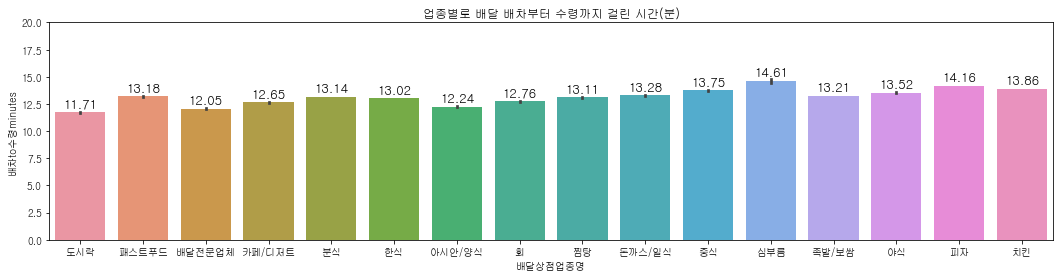

In [67]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='배차to수령minutes',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 배차부터 수령까지 걸린 시간(분)')
plt.ylim(top=20)


plt.show()

- 배차가 완료되고 배달기사가 수령을 완료하는 시간입니다.

### 접수부터 수령까지(조리및세팅시간)

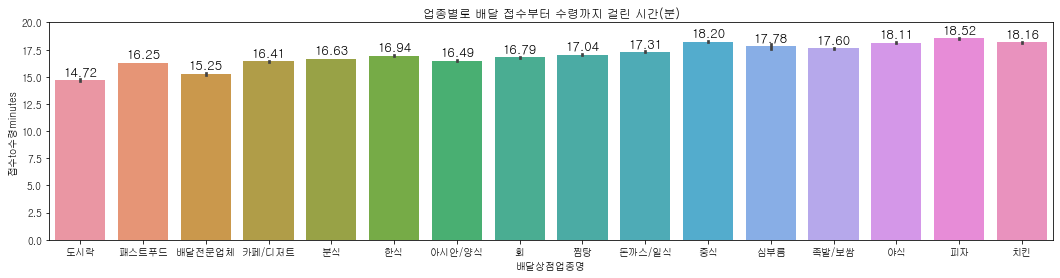

In [69]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='배달상점업종명', y='접수to수령minutes',
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 접수부터 수령까지 걸린 시간(분)')
plt.ylim(top=20)


plt.show()

- 주문을 접수하는 순간부터 배달기사가 수령하는 순간까지걸리는 시간입니다.
- 도시락과 야식, 피자, 치킨 업종은 거의 3분이 넘게 차이가 납니다.
- 패스트푸드는 수령까지 시간이 꽤 걸리지만 실제 배송 시간이 가장 짧아 두 번째로 빠른 업종이 되었습니다.

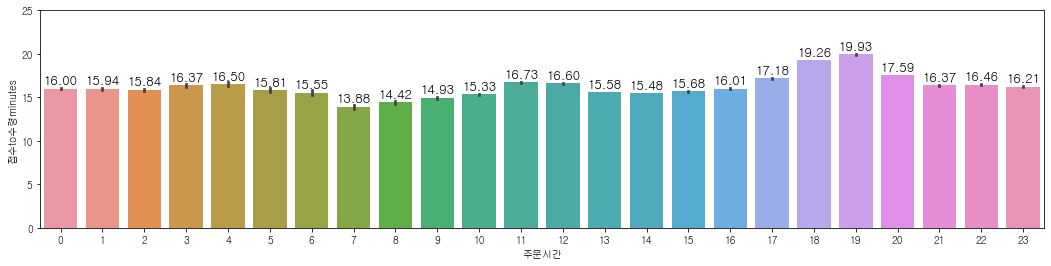

In [79]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문시간', y='접수to수령minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=25)

plt.show()

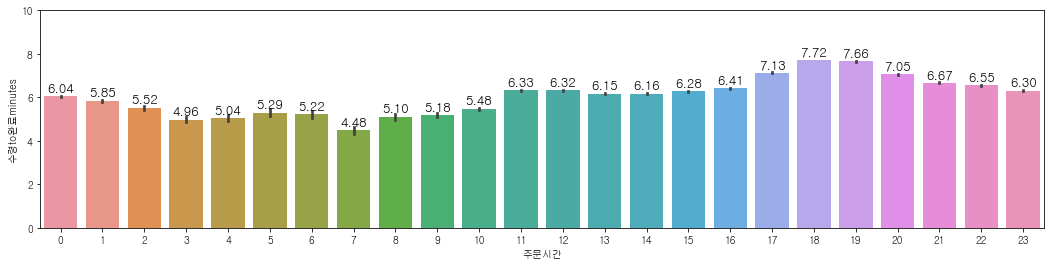

In [484]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_uncanceled, x='주문시간', y='수령to완료minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=10)
plt.show()

## TOTAL PRICE

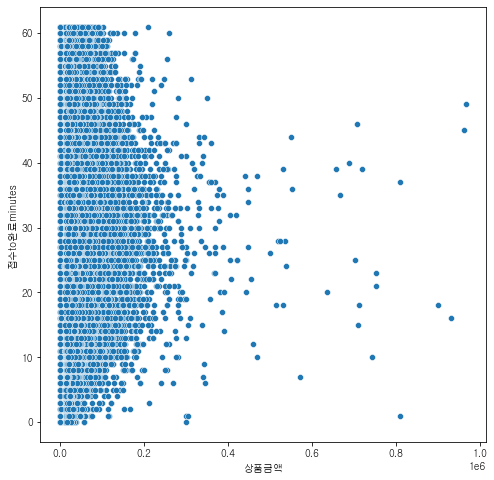

In [168]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=dlvr_uncanceled, x='상품금액', y='접수to완료minutes')
plt.show()

- 상품금액이 높을수록 많은 양의 음식을 주문했다고 추정할 수 있습니다.
- 그러나 상품금액이 높다고 해서 배달소요시간이 오래 걸리지는 않는다는 것을 알 수 있습니다.

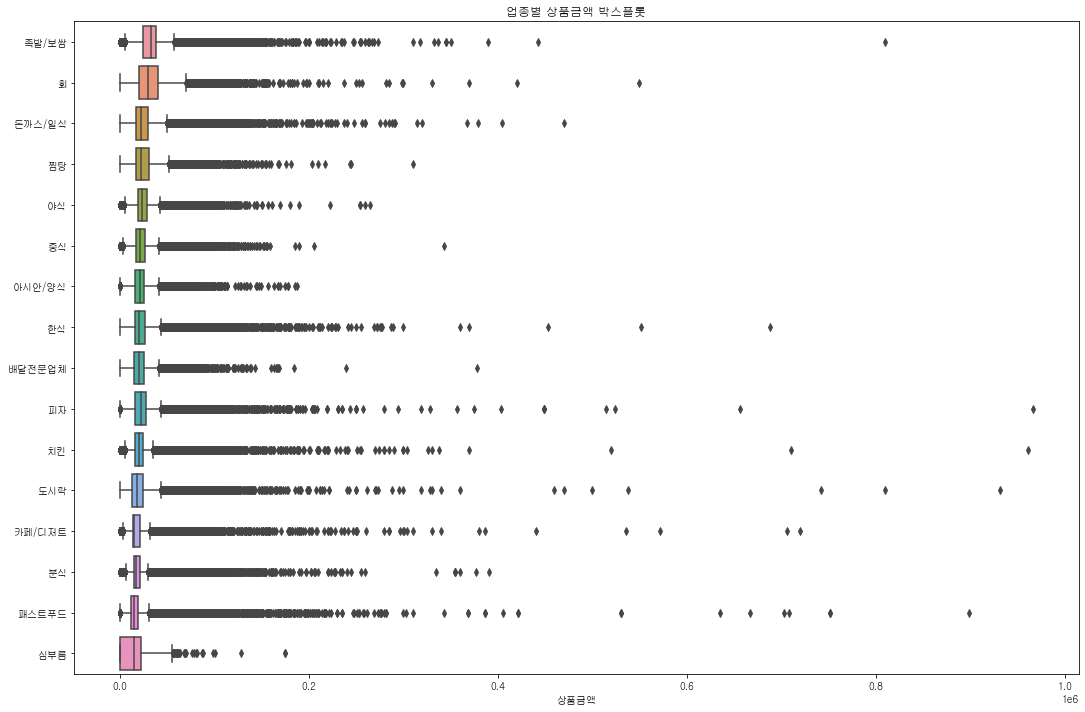

In [185]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=dlvr_uncanceled, y='배달상점업종명', x='상품금액',
           order=dlvr_uncanceled.groupby(['배달상점업종명'])['상품금액'].mean().sort_values(ascending=False).index)
plt.ylabel('')
plt.title('업종별 상품금액 박스플롯')
plt.show()

## popl.csv

- 행정동별 생활인구 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 KT 데이터)
- 데이터 정의 : 시간대-행정동-성별-연령 구분에 따른 생활인구 데이터

In [15]:
popl_cols = ['기준년월일', '24시간대구분코드', '성별구분코드', '연령대구분코드',
             '행정동코드', '내국인수', '장기외국인수', '단기외국인수', '알수없음']
popl = pd.read_csv(kt_data_path + '\\popl.csv', encoding='cp949', header=0, names=popl_cols,
                  usecols=popl_cols[:8])

In [16]:
popl.head()

기준년월일  24시간대구분코드 성별구분코드 연령대구분코드     행정동코드  내국인수  장기외국인수  단기외국인수
0  20200212          2      F  age_50  11110515   205       0       0
1  20200212          2      F  age_15  11110515    78       0       0
2  20200212         21      F  age_10  11110515    28       0       0
3  20200212          7      F  age_10  11110515    49       0       0
4  20200212         16      M  age_25  11110515   291       0       0

In [17]:
popl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25950445 entries, 0 to 25950444
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준년월일      int64 
 1   24시간대구분코드  int64 
 2   성별구분코드     object
 3   연령대구분코드    object
 4   행정동코드      int64 
 5   내국인수       int64 
 6   장기외국인수     int64 
 7   단기외국인수     int64 
dtypes: int64(6), object(2)
memory usage: 1.5+ GB


In [18]:
popl.describe().T

count          mean            std         min         25%  \
기준년월일      25950445.0  2.020040e+07     155.890975  20200119.0  20200229.0   
24시간대구분코드  25950445.0  1.149965e+01       6.922254         0.0         5.0   
행정동코드      25950445.0  1.143319e+07  192124.274295  11110515.0  11260630.0   
내국인수       25950445.0  1.885166e+02     196.047348         0.0        68.0   
장기외국인수     25950445.0  5.737834e+00      48.127445         0.0         0.0   
단기외국인수     25950445.0  3.917991e-01      10.340772         0.0         0.0   

                  50%         75%         max  
기준년월일      20200410.0  20200521.0  20200630.0  
24시간대구분코드        11.0        17.0        23.0  
행정동코드      11440630.0  11620525.0  11740700.0  
내국인수            143.0       255.0      7239.0  
장기외국인수            0.0         0.0      1719.0  
단기외국인수            0.0         0.0      2594.0

In [19]:
popl.isnull().sum()

기준년월일        0
24시간대구분코드    0
성별구분코드       0
연령대구분코드      0
행정동코드        0
내국인수         0
장기외국인수       0
단기외국인수       0
dtype: int64

## StartupOrClosing_Shop.csv

- 업종/상호별 창업·폐업 유추 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 (주)네스 데이터)
- 데이터 정의 : 114에 등록된 정보 기반의 업종/상호별 창업·폐업 유추 분류 데이터

In [20]:
pd.read_csv(kt_data_path + '\\StartupOrClosing_Shop_ver2.csv')

No      DATE   INDUTY_NM         CMPNM  INDUTY_CODEM  division
0            1  20200101        CCTV       (주)실라전자        319013         1
1            2  20200101  가공식품도매(기타)  송현동1986발효이야기        452199         1
2            3  20200101    가구판매(종합)       더갤러리전주점        571100         1
3            4  20200101   가정부.파출부소개        모두인력파출        839103         1
4            5  20200101      가정부업알선        모두인력파출        839101         1
...        ...       ...         ...           ...           ...       ...
101779  101780  20200630         휴대폰     (주)엠.비텔레콤        581410         0
101780  101781  20200630         휴대폰         (주)지도        581410         0
101781  101782  20200630         휴대폰          대일통신        581410         0
101782  101783  20200630         휴대폰          이지더폰        581410         0
101783  101784  20200630         휴대폰          황소통신        581410         0

[101784 rows x 6 columns]

In [21]:
shop_cols = ['인덱스','날짜','업종명','상호','업종코드','구분']
shop = pd.read_csv(kt_data_path + '\\StartupOrClosing_Shop_ver2.csv', header=0, names=shop_cols)

In [22]:
shop

인덱스        날짜         업종명            상호    업종코드  구분
0            1  20200101        CCTV       (주)실라전자  319013   1
1            2  20200101  가공식품도매(기타)  송현동1986발효이야기  452199   1
2            3  20200101    가구판매(종합)       더갤러리전주점  571100   1
3            4  20200101   가정부.파출부소개        모두인력파출  839103   1
4            5  20200101      가정부업알선        모두인력파출  839101   1
...        ...       ...         ...           ...     ...  ..
101779  101780  20200630         휴대폰     (주)엠.비텔레콤  581410   0
101780  101781  20200630         휴대폰         (주)지도  581410   0
101781  101782  20200630         휴대폰          대일통신  581410   0
101782  101783  20200630         휴대폰          이지더폰  581410   0
101783  101784  20200630         휴대폰          황소통신  581410   0

[101784 rows x 6 columns]

In [23]:
shop.날짜.value_counts()

20200529    64454
20200602     3320
20200630     2052
20200530     2014
20200604     1845
            ...  
20200521        2
20200103        2
20200525        2
20200218        1
20200213        1
Name: 날짜, Length: 107, dtype: int64

In [24]:
shop.업종명.nunique(), shop.날짜.nunique()

(2955, 107)

In [25]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101784 entries, 0 to 101783
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   인덱스     101784 non-null  int64 
 1   날짜      101784 non-null  int64 
 2   업종명     101784 non-null  object
 3   상호      101783 non-null  object
 4   업종코드    101784 non-null  int64 
 5   구분      101784 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.7+ MB


## StartupOrClosing_Region.csv

- 업종/지역별 창업·폐업 유추 데이터 (출처 : KT 통신 빅데이터 플랫폼 내 (주)네스 데이터)
- 데이터 정의 : 114에 등록된 정보 기반의 업종/지역별 창업·폐업 유추 분류 데이터

In [26]:
region_cols = ['인덱스','날짜','업종명','광역시도명','시군구명','읍면동','위도값','경도값','구분']
region = pd.read_csv(kt_data_path + '\\StartupOrClosing_Region_ver2.csv', header=0, names=region_cols)

In [27]:
region

인덱스        날짜        업종명 광역시도명       시군구명   읍면동        위도값  \
0          1  20200101        부동산    경기    용인시 처인구   봉명리  37.109***   
1          2  20200101  토목공학엔지니어링    인천         서구   오류동  37.598***   
2          3  20200101         한식    강원    영월군 영월읍   영흥리  37.187***   
3          4  20200101      보일러판매    대전         중구    목동  36.336***   
4          5  20200101       돼지국밥    경남  창원시 마산합포구    현동  35.147***   
...      ...       ...        ...   ...        ...   ...        ...   
67252  67253  20200630        부동산    경남       김해시    삼문동  35.190***   
67253  67254  20200630         호프    경기    용인시 기흥구   공세동  37.240***   
67254  67255  20200630        떡볶이    경기    성남시 분당구   야탑동  37.412***   
67255  67256  20200630   악기제조(종합)    인천         중구  관동3가  37.471***   
67256  67257  20200630        예식장    서울        강동구   암사동  37.550***   

              경도값  구분  
0      127.131***   1  
1      126.613***   1  
2      128.473***   1  
3      127.403***   1  
4      128.557***   1  
...           ...  ..  
67252  128.810***   0  
67253  127.108***   0  
67254  127.129***   0  
67255  126.624***   0  
67256  127.128***   0  

[67257 rows x 9 columns]

In [28]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67257 entries, 0 to 67256
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   인덱스     67257 non-null  int64 
 1   날짜      67257 non-null  int64 
 2   업종명     67257 non-null  object
 3   광역시도명   67257 non-null  object
 4   시군구명    67257 non-null  object
 5   읍면동     67257 non-null  object
 6   위도값     67257 non-null  object
 7   경도값     67257 non-null  object
 8   구분      67257 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [29]:
region.업종명.nunique(), region.날짜.nunique()

(1991, 149)

## WEATHER

- 기상상태에 따른 배달소요시간은 어떤 차이가 있는지 확인해보겠습니다.
- 서울특별시만 살펴보겠습니다.
- 기상데이터는 기상청데이터를 가져왔습니다.

In [254]:
weather = pd.read_csv(r'C:\Users\Wyatt\wyatt37\data\ktVisual\OBS_ASOS_TIM.csv', encoding='cp949').fillna(0)

In [255]:
weather.columns = ['지점', '지점명', '일시', '기온', '강수량', '풍속', '습도', '일조', '적설', '지면온도']

In [256]:
weather.head()

지점 지점명                일시   기온  강수량   풍속  습도   일조   적설  지면온도
0  108  서울  2019-12-01 01:00  5.1  0.0  0.7  54  0.0  0.0   4.2
1  108  서울  2019-12-01 02:00  4.9  0.0  0.0  55  0.0  0.0   4.3
2  108  서울  2019-12-01 03:00  4.6  0.0  1.3  66  0.0  0.0   3.7
3  108  서울  2019-12-01 04:00  4.6  0.0  1.0  65  0.0  0.0   4.3
4  108  서울  2019-12-01 05:00  4.8  0.0  1.1  65  0.0  0.0   4.5

In [258]:
weather['눈비'] = weather.강수량 + weather.적설

In [260]:
weather['배달시간'] = pd.to_datetime(weather.일시)

In [261]:
weather['배달시간월'] = weather.배달시간.dt.month
weather['배달시간일'] = weather.배달시간.dt.day
weather['배달시간시'] = weather.배달시간.dt.hour

In [262]:
weather.loc[weather.눈비 == 0, '눈비여부'] = False
weather.loc[weather.눈비 != 0, '눈비여부'] = True

In [263]:
dlvr_seoul_uncanceled = dlvr_uncanceled.loc[dlvr_uncanceled.배달상점광역시도명 == '서울특별시']

In [264]:
# merge 해줄 키 컬럼은 배달수령시간을 round 한 컬럼으로 하겠습니다.
dlvr_seoul_uncanceled['배달시간'] = dlvr_seoul_uncanceled.배달수령시간.dt.round('H')

In [265]:
dlvr_seoul_uncanceled_weather = pd.merge(dlvr_seoul_uncanceled, weather.iloc[:, 3:], how='left', on='배달시간')

### RAINY

In [161]:
plt.figure(figsize=(5, 4))
plots = sns.countplot(data=dlvr_seoul_uncanceled_weather, x='눈비여부')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=1000000)
plt.title('눈비여부에 따른 주문건수')
plt.show()

In [164]:
plt.figure(figsize=(5, 4))
plots = sns.barplot(data=dlvr_seoul_uncanceled_weather, x='눈비여부', y='수령to완료minutes')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=10)
plt.title('눈비여부에 따른 주문건수')
plt.show()

## PATIENT

- 코로나 확진자의 증가여부는 배달주문건수에 영향을 미치는가?

In [266]:
patient = pd.read_csv(covid19_path + '\\PatientInfo.csv')

In [267]:
patient_soodokwon = patient.loc[patient.province.isin(['Seoul', 'Gyeonggi-do', 'Incheon'])]

In [268]:
patient_soodokwon = patient_soodokwon.groupby(['province', 'city', 'confirmed_date'])['patient_id'].count().reset_index()

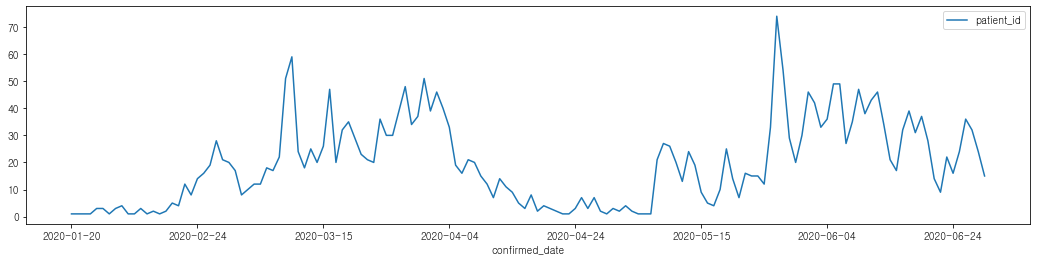

In [269]:
patient_soodokwon.groupby(['confirmed_date']).sum().plot(kind='line', figsize=(18, 4))
plt.show()

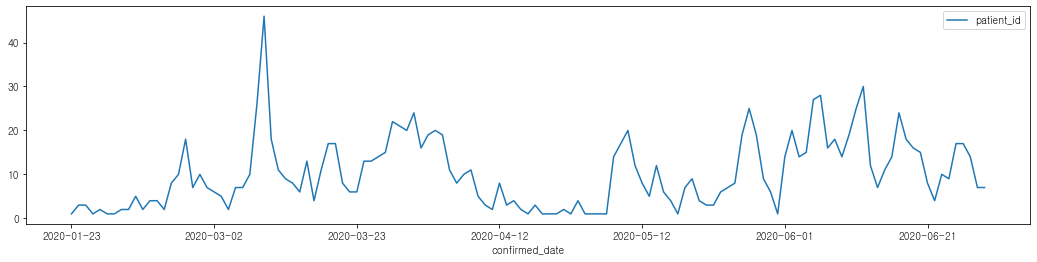

In [270]:
patient_soodokwon.loc[patient_soodokwon.province == 'Seoul'].groupby(['confirmed_date']).sum().plot(kind='line', figsize=(18, 4))
plt.show()

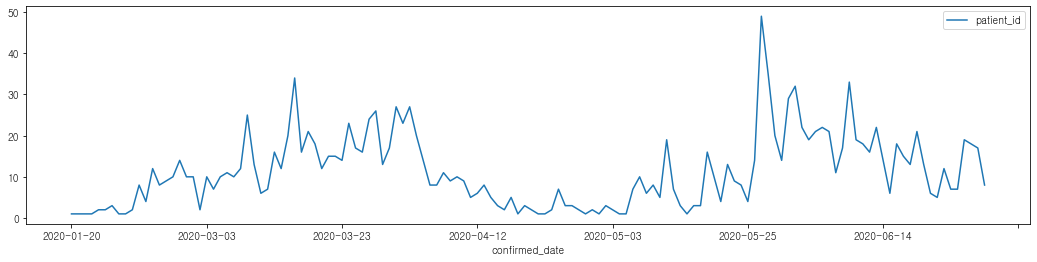

In [271]:
patient_soodokwon.loc[patient_soodokwon.province != 'Seoul'].groupby(['confirmed_date']).sum().plot(kind='line', figsize=(18, 4))
plt.show()

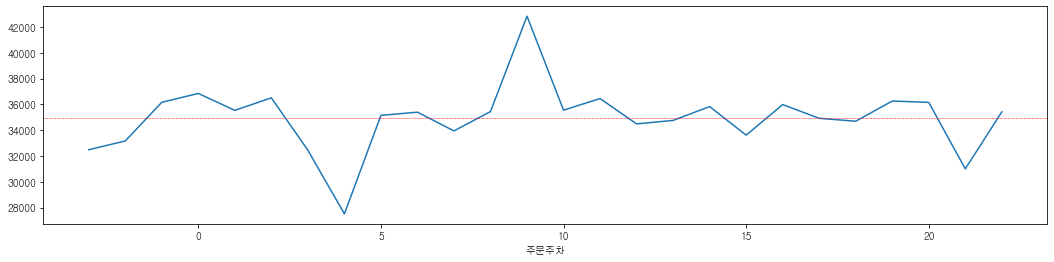

In [305]:
dlvr_seoul_uncanceled.loc[dlvr_seoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().plot(kind='line',
                                                                                                 figsize=(18, 4))
plt.axhline(y = dlvr_seoul_uncanceled.loc[dlvr_seoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().mean(),
            color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

- 갑자기 주문량이 폭주한 저 날은 언제인가...
- 3월 1일입니다.
- 문제는 일별 주문건수가 전혀 증가하는 추세가 아니라는 점입니다. 꾸준히 유지되고 있습니다.

In [273]:
dlvr_noseoul_uncanceled = dlvr_uncanceled.loc[dlvr_uncanceled.배달상점광역시도명 != '서울특별시']

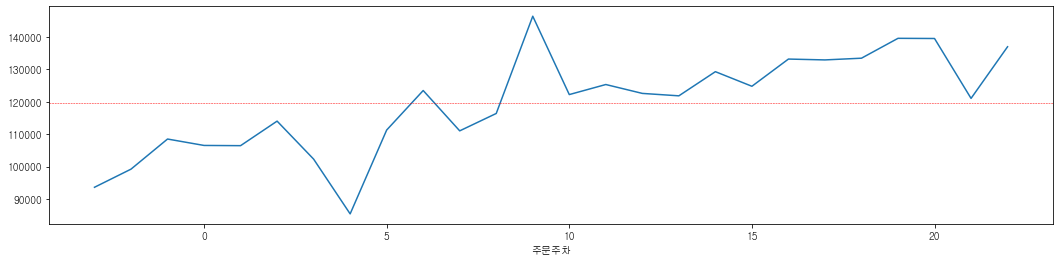

In [307]:
dlvr_noseoul_uncanceled.loc[dlvr_noseoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().plot(kind='line',
                                                                                                     figsize=(18, 4))
plt.axhline(y = dlvr_noseoul_uncanceled.loc[dlvr_noseoul_uncanceled.주문주차 != -4].groupby(['주문주차'])['순번'].count().mean(),
            color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

- 경기도 지역은 증가하는 추세에 있습니다.

In [292]:
temp = dlvr_uncanceled.groupby(['주문월', '배달상점업종명'])['순번'].count().reset_index()
temp['주문월'] = temp.주문월.replace({12:0})

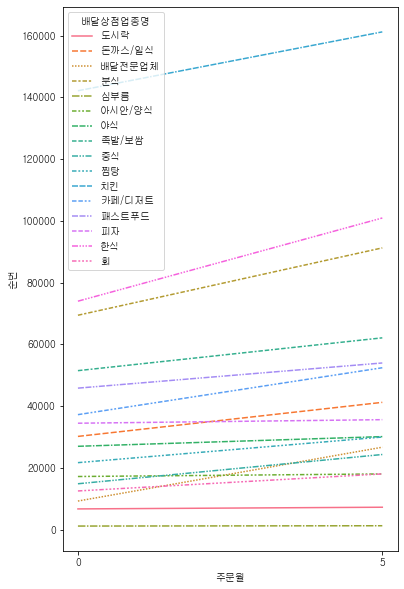

In [298]:
plt.figure(figsize=(6, 10))
sns.lineplot(data=temp.loc[temp.주문월.isin([0, 5])], x='주문월', y='순번', hue='배달상점업종명', style='배달상점업종명')
plt.xticks(ticks=[0, 5])
plt.show()

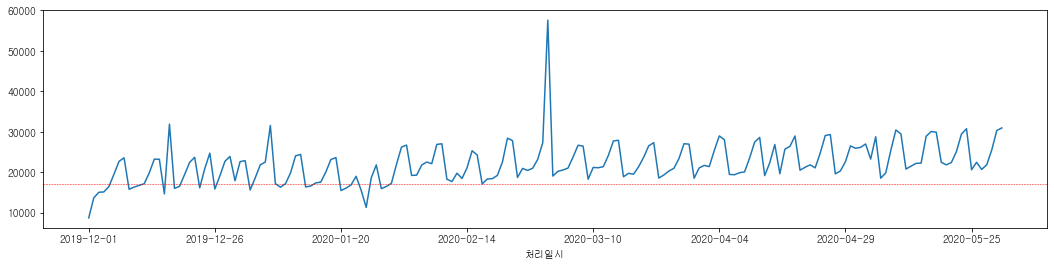

In [277]:
dlvr_uncanceled.groupby(['처리일시'])['순번'].count().plot(kind='line', figsize=(18, 4))
plt.axhline(y = dlvr_noseoul_uncanceled.groupby(['처리일시'])['순번'].count().mean(),
            color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

## 지역별

In [248]:
dlvr.columns

Index(['순번', '처리일시', '배달요청업체ID', '배달요청상태값', '배달접수업체ID', '배달상점ID', '배달상점업종명',
       '배달상점법정동코드', '배달상점광역시도명', '배달상점시군구명', '배달상점법정동명', '배달상점리명', '배달상점행정동코드',
       '배달상점도로명주소코드', '배달목적지법정동코드', '배달목적지광역시도명', '배달목적지시군구명', '배달목적지법정동명',
       '배달목적지리명', '배달목적지행정동코드', '배달목적지도로명주소코드', '배달자ID', '배달금액', '호출중계수수료금액',
       '상품금액', '결제종류값', '결제카드명', '배달접수시간', '배달배차시간', '배달수령시간', '배달완료시간',
       '배달취소시간', '접수to배차', '접수to수령', '접수to완료', '배차to수령', '배차to완료', '수령to완료',
       '접수to취소', '배차to취소', '수령to취소', '완료to취소', '접수to배차minutes',
       '접수to수령minutes', '접수to완료minutes', '배차to수령minutes', '배차to완료minutes',
       '수령to완료minutes', '접수to취소minutes', '배차to취소minutes', '수령to취소minutes',
       '완료to취소minutes'],
      dtype='object')

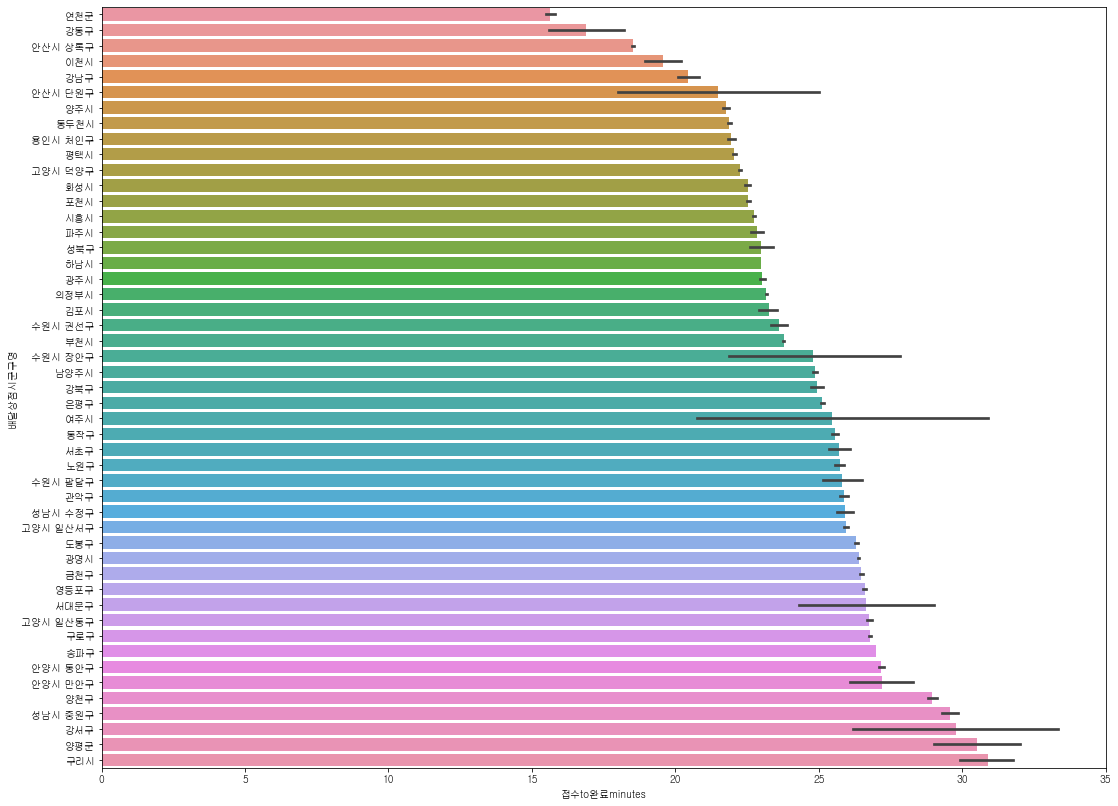

In [252]:
plt.figure(figsize=(18, 14))
sns.barplot(data=dlvr_uncanceled, y='배달상점시군구명', x='접수to완료minutes',
           order=dlvr_uncanceled.groupby(['배달상점시군구명'])['접수to완료minutes'].mean().sort_values().index)
plt.show()

# REGION OPEN CLOSE

- 1:창업 0:폐업

In [40]:
region_cols = ['인덱스','날짜','업종명','광역시도명','시군구명','읍면동','위도값','경도값','구분']
region = pd.read_csv(kt_data_path + '\\StartupOrClosing_Region_ver2.csv', header=0, names=region_cols)

In [41]:
# 1: 창업
# 0: 폐업
region.loc[region.구분 == 1, '구분'] = '창업'
region.loc[region.구분 == 0, '구분'] = '폐업'

In [44]:
region['광역시도명'] = region.광역시도명.replace({'경기도': '경기', '전라남도':'전남'})

In [46]:
region['위도값'] = region.위도값.str.replace('*','')
region['경도값'] = region.경도값.str.replace('*','')

region['위도값'] = region.위도값.astype(np.float32)
region['경도값'] = region.경도값.astype(np.float32)

In [47]:
# 업종명에 맞춰서 배달상점업종명을 만들어줍니다.
# 정말 힘들었습니다.

region.loc[region.업종명.isin(['한식', '육류.고기요리', '칼국수', '곱창.양구이', '오리고기', '냉면', '장어',
                            '한정식', '해물.생선요리', '닭갈비', '국수', '삼겹살', '돼지갈비', '게요리',
                            '낙지요리', '오징어요리', '한우고기', '쭈꾸미요리', '막국수', '두부요리', '전복요리',
                            '쌈밥', '닭요리', '순두부', '보리밥', '비빕밥', '흙돼지', '코다리전문', '오리요리',
                            '음식점-닭요리전문', '닭집', '밀면', '콩국수', '한식배달', '비빕밥', '굴요리']),
           '배달상점업종명'] = '한식'

region.loc[region.업종명.isin(['감자탕', '추어탕', '사철.영양탕', '순대.순대국', '부대찌개', '음식점-생태/동태/명태요리전문',
                            '설렁탕', '삼계탕', '해장국', '샤브샤브', '곰탕', '소머리국밥', '매운탕', '찌개.전골', '찜닭',
                            '돼지국밥', '어죽', '순대국밥', '백숙', '붕어찜', '소고기국밥', '버섯요리', '대구탕', '어죽',
                            '아귀요리', '복어요리', '조개구이']),
           '배달상점업종명'] = '찜탕'

region.loc[region.업종명.isin(['카페', '제과점', '떡집', '음료제조(종합)', '빵.과자', '떡.한과', '핫도그', '샌드위치',
                            '카페-디저트', '토스트', '전통찻집', '호두과자', '도너츠', '감자튀김', '와플전문점',
                           '케이크전문점', '오메기떡판매', '수제파이', '보리빵']),
           '배달상점업종명'] = '카페/디저트'

region.loc[region.업종명.isin(['양식', '베트남음식', '패밀리레스토랑', '퓨전음식', '태국음식', '양고기',
                            '스파게티', '이탈리아요리', '인도음식', '스페인요리', '멕시코요리', '동남아음식']),
           '배달상점업종명'] = '아시안/양식'

region.loc[region.업종명.isin(['일식', '참치요리', '돈가스', '일식튀김.꼬치', '우동', '초밥.롤', '철판구이']),
           '배달상점업종명'] = '일식'

region.loc[region.업종명.isin(['횟집', '홍어', '수산물음식점', '문어요리']),
           '배달상점업종명'] = '회'

region.loc[region.업종명.isin(['분식', '김밥', '떡볶이', '라면', '주먹밥']),
           '배달상점업종명'] = '분식'

region.loc[region.업종명.isin(['중국음식', '음식점-마라탕', '만두']), '배달상점업종명'] = '중식'
region.loc[region.업종명.isin(['치킨', '닭강정']), '배달상점업종명'] = '치킨'
region.loc[region.업종명.isin(['패스트푸드(종합)', '햄버거']), '배달상점업종명'] = '패스트푸드'
region.loc[region.업종명.isin(['닭발', '야식']), '배달상점업종명'] = '야식'
region.loc[region.업종명.isin(['피자']), '배달상점업종명'] = '피자'
region.loc[region.업종명.isin(['도시락']), '배달상점업종명'] = '도시락'
region.loc[region.업종명.isin(['족발.보쌈']), '배달상점업종명'] = '족발/보쌈'

In [48]:
region_food = region.loc[~region.배달상점업종명.isnull()].reset_index(drop=True)

In [51]:
region_food

인덱스        날짜   업종명 광역시도명       시군구명  읍면동        위도값         경도값  구분  \
0         3  20200101    한식    강원    영월군 영월읍  영흥리  37.187000  128.473007  창업   
1         5  20200101  돼지국밥    경남  창원시 마산합포구   현동  35.146999  128.557007  창업   
2         7  20200102   햄버거    경기    용인시 처인구  완장리  37.155998  127.172997  창업   
3        13  20200102  중국음식    광주         북구  용두동  35.213001  126.875999  창업   
4        15  20200102   삼계탕    제주    제주시 조천읍  함덕리  33.542999  126.654999  창업   
...     ...       ...   ...   ...        ...  ...        ...         ...  ..   
9818  67244  20200630    한식    제주      서귀포시   도순동  33.252998  126.470001  폐업   
9819  67247  20200630    치킨    부산         남구  대연동  35.151001  129.089005  폐업   
9820  67248  20200630    한식    서울        성동구  행당동  37.558998  127.040001  폐업   
9821  67249  20200630    카페    대전         서구  관저동  36.306000  127.343002  폐업   
9822  67255  20200630   떡볶이    경기    성남시 분당구  야탑동  37.411999  127.128998  폐업   

     배달상점업종명  
0         한식  
1         찜탕  
2      패스트푸드  
3         분식  
4         찜탕  
...      ...  
9818      한식  
9819      치킨  
9820      한식  
9821  카페/디저트  
9822      분식  

[9823 rows x 10 columns]

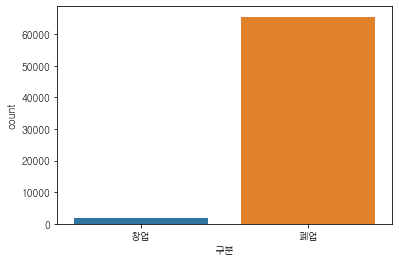

In [52]:
sns.countplot(data=region, x='구분')
plt.show()

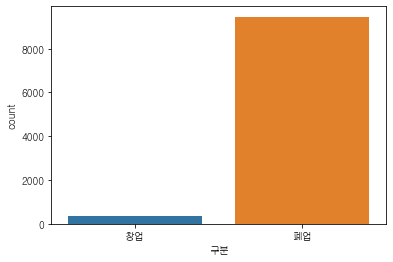

In [53]:
sns.countplot(data=region_food, x='구분')
plt.show()

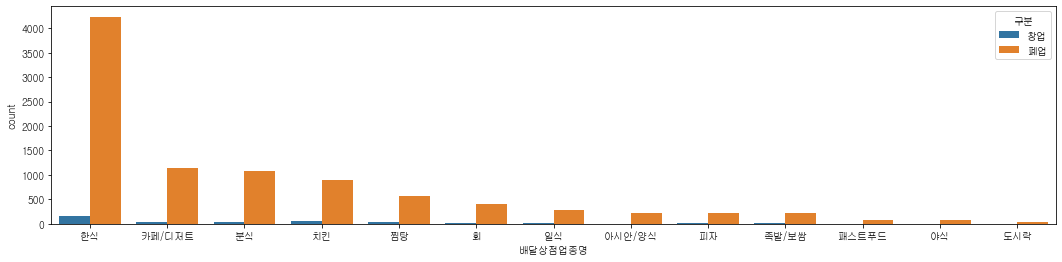

In [54]:
plt.figure(figsize=(18, 4))
sns.countplot(data=region_food, x='배달상점업종명', hue='구분',
             order=region_food.groupby(['배달상점업종명'])['인덱스'].count().sort_values(ascending=False).index)
plt.show()

- 한식은 폐업도 많지만 창업도 많습니다. 그러나 압도적으로 많은 것도 사실입니다.
- 그 뒤로 카페/디저트, 분식, 치킨, 찜탕이 뒤를 잇습니다.

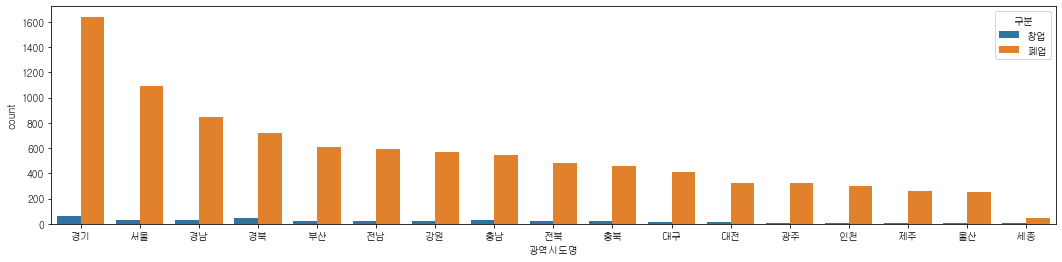

In [55]:
plt.figure(figsize=(18, 4))
sns.countplot(data=region_food, x='광역시도명', hue='구분',
             order=region_food.groupby(['광역시도명'])['인덱스'].count().sort_values(ascending=False).index)
plt.show()

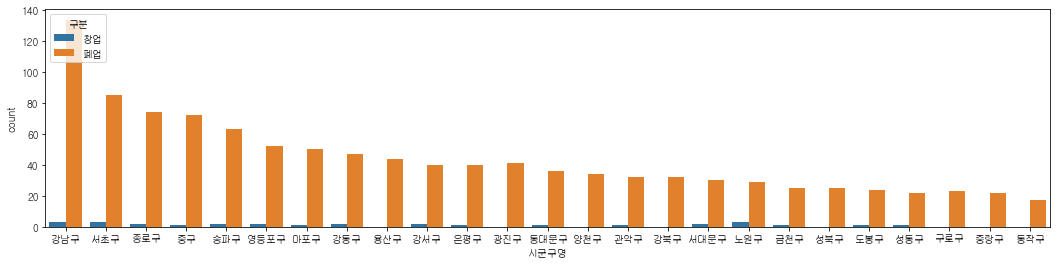

In [56]:
plt.figure(figsize=(18, 4))
sns.countplot(data=region_food.loc[region_food.광역시도명 == '서울'], x='시군구명', hue='구분', hue_order=['창업', '폐업'],
             order=region_food.loc[region_food.광역시도명 == '서울'].groupby(['시군구명'])['인덱스'].count().sort_values(ascending=False).index)
plt.show()

- 구별로 배달상점업종별 폐업건수를 살펴보고자 합니다.

In [72]:
goos = region_food.loc[region_food.광역시도명 == '서울'].groupby(['시군구명'])['인덱스'].count().sort_values(ascending=False).index

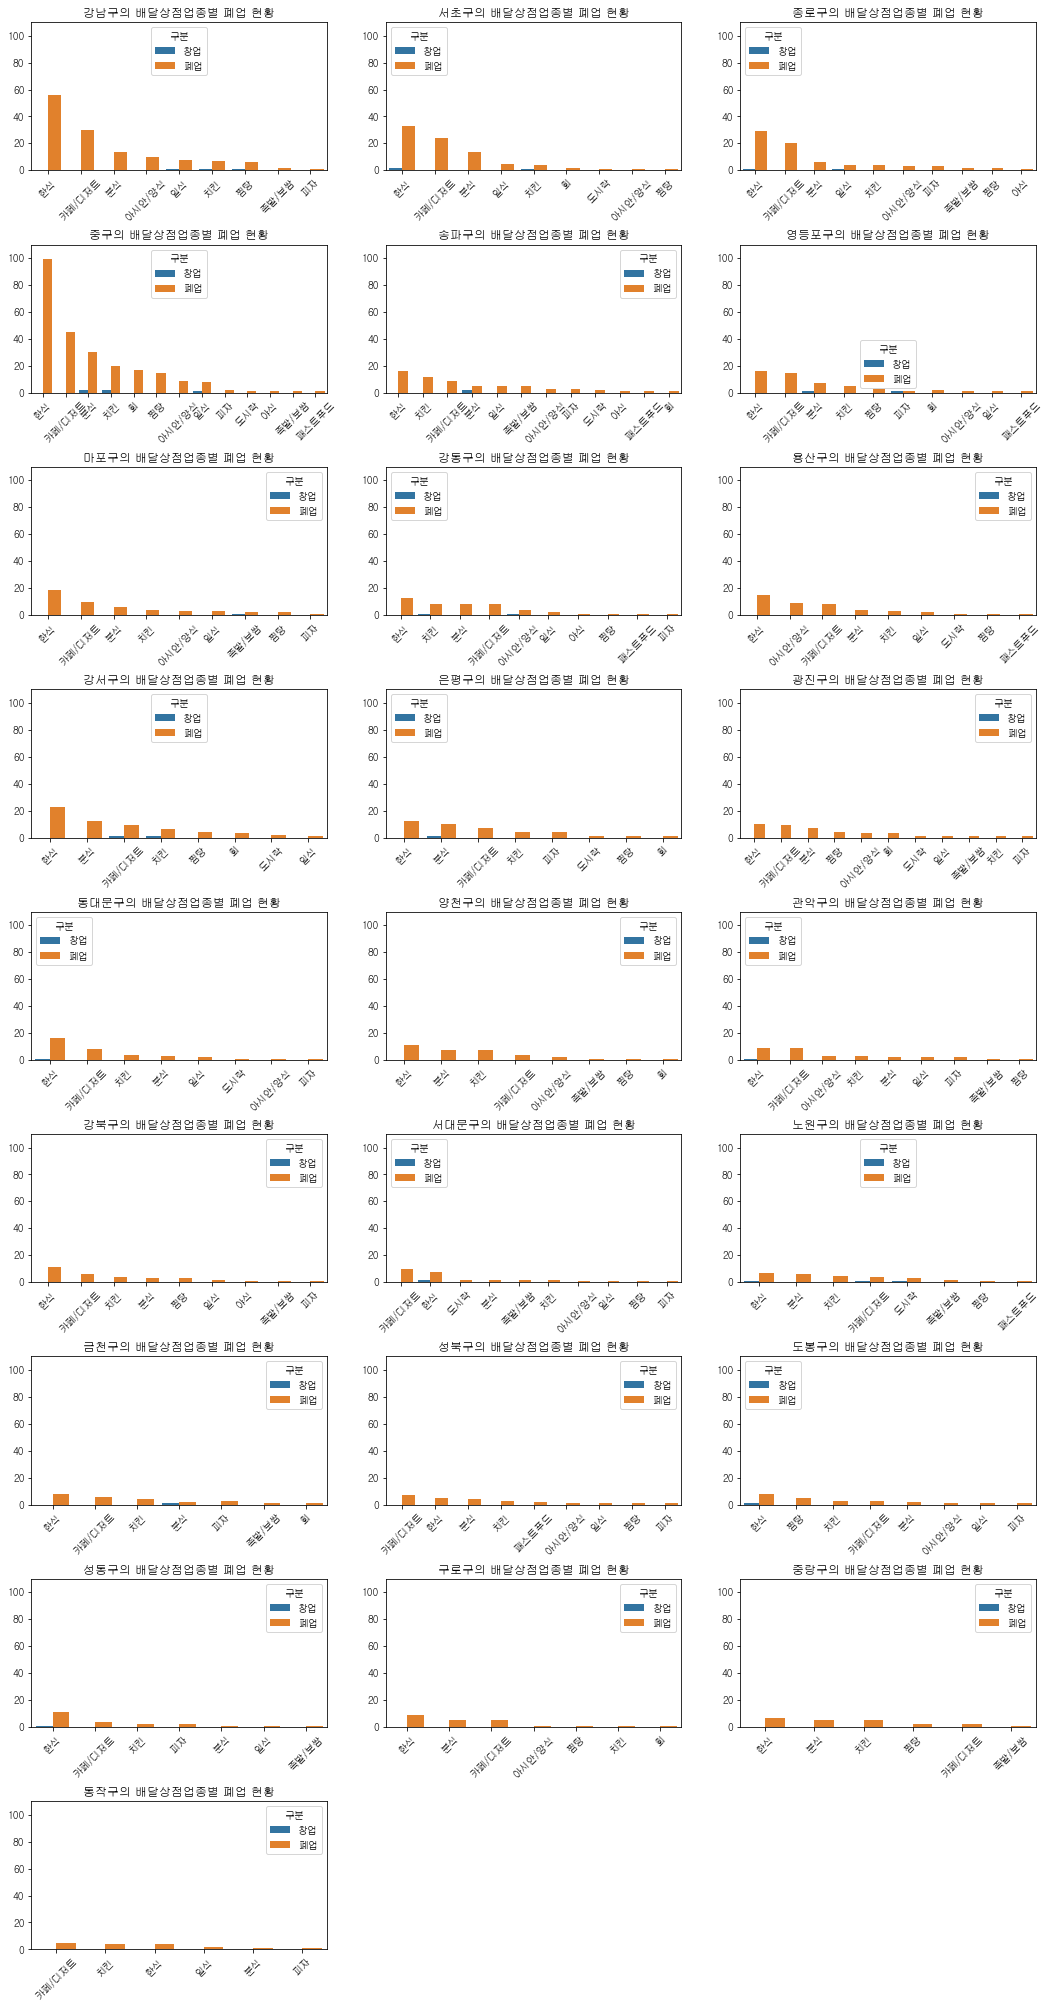

In [90]:
fig = plt.figure(figsize=(18, 60))
for i, goo in enumerate(goos):
    plt.subplot(15, 3, i+1)
    sns.countplot(data=region_food.loc[region_food.시군구명 == goo], x='배달상점업종명', hue='구분', hue_order=['창업', '폐업'],
                 order=region_food.loc[region_food.시군구명 == goo].groupby(['배달상점업종명'])['인덱스'].count().sort_values(ascending=False).index)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}의 배달상점업종별 폐업 현황'.format(goo))
    plt.ylim(top = 110)
    plt.xticks(rotation=45)

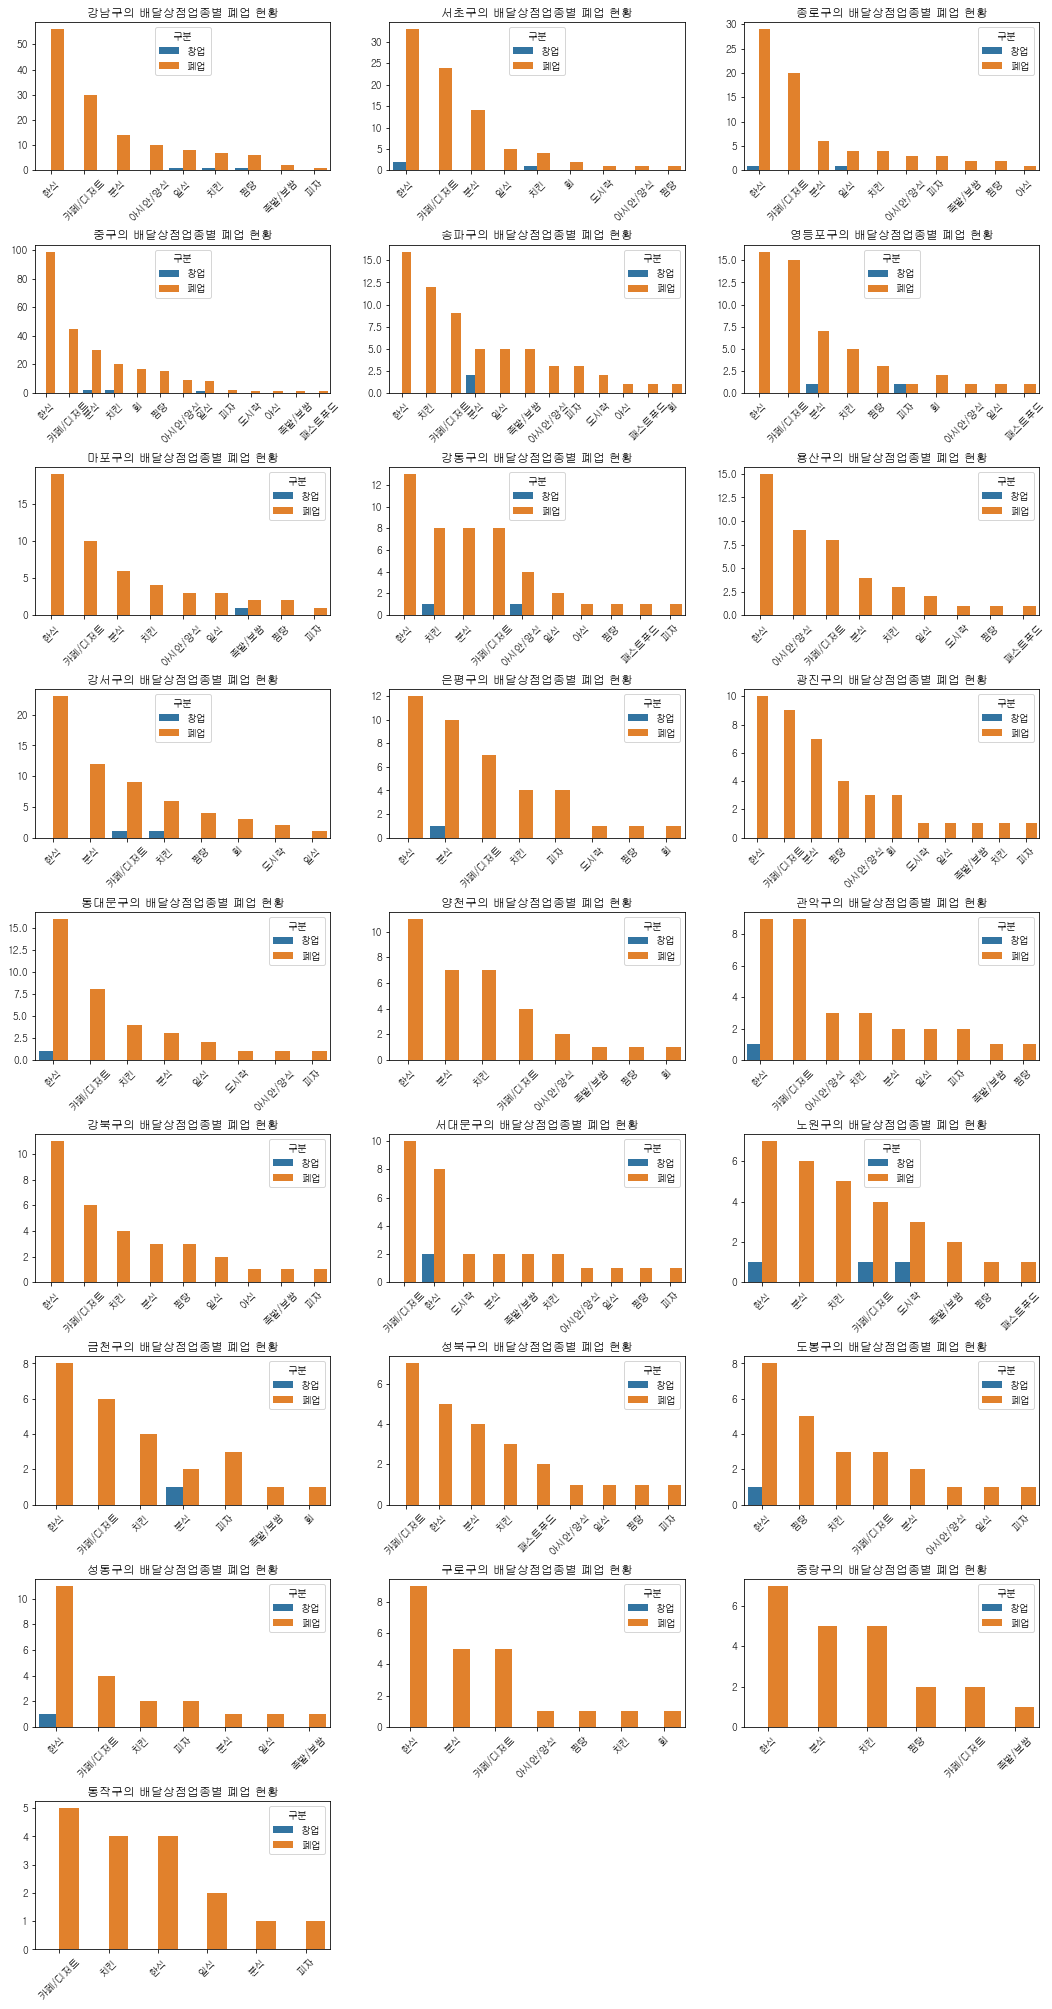

In [91]:
fig = plt.figure(figsize=(18, 60))
for i, goo in enumerate(goos):
    plt.subplot(15, 3, i+1)
    sns.countplot(data=region_food.loc[region_food.시군구명 == goo], x='배달상점업종명', hue='구분', hue_order=['창업', '폐업'],
                 order=region_food.loc[region_food.시군구명 == goo].groupby(['배달상점업종명'])['인덱스'].count().sort_values(ascending=False).index)
    plt.subplots_adjust(hspace=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}의 배달상점업종별 폐업 현황'.format(goo))
    #plt.ylim(top = 110)
    plt.xticks(rotation=45)

- 한식의 안에서는 도대체 무슨 일이 벌어지고 있는 것인가?

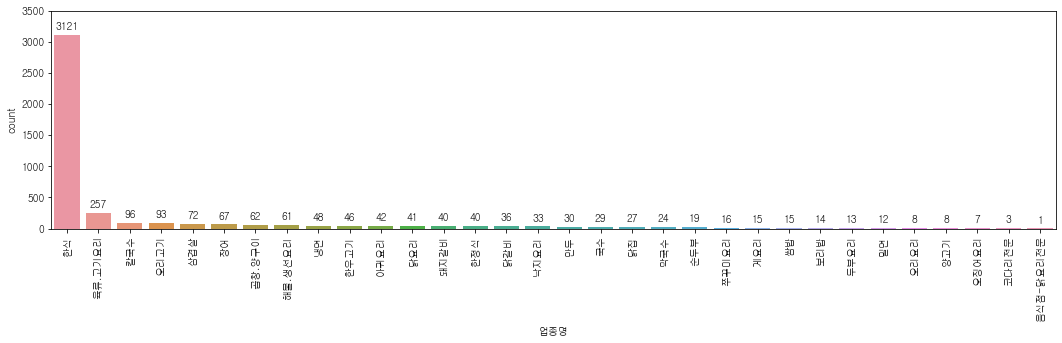

In [99]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=region_food.loc[region_food.배달상점업종명 == '한식'], x='업종명', #hue='구분', hue_order=['창업', '폐업'],
             order=region_food.loc[region_food.배달상점업종명 == '한식'].groupby(['업종명'])['인덱스'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top = 3500)
plt.xticks(rotation=90)
plt.show()

- 일반 한식류가 압도적으로 높습니다. 사실 한식류 안에 다양한 세부 업종이 나뉠 것으로 보이지만, 알 수 없습니다.
- 이를 알려면 가게 이름으로 파악을 해야겠습니다.

In [100]:
region.head()

인덱스        날짜        업종명 광역시도명       시군구명  읍면동        위도값         경도값  구분  \
0    1  20200101        부동산    경기    용인시 처인구  봉명리  37.109001  127.130997  창업   
1    2  20200101  토목공학엔지니어링    인천         서구  오류동  37.598000  126.612999  창업   
2    3  20200101         한식    강원    영월군 영월읍  영흥리  37.187000  128.473007  창업   
3    4  20200101      보일러판매    대전         중구   목동  36.335999  127.403000  창업   
4    5  20200101       돼지국밥    경남  창원시 마산합포구   현동  35.146999  128.557007  창업   

  배달상점업종명  
0     NaN  
1     NaN  
2      한식  
3     NaN  
4      찜탕

In [101]:
shop.head()

인덱스        날짜         업종명            상호    업종코드  구분
0    1  20200101        CCTV       (주)실라전자  319013   1
1    2  20200101  가공식품도매(기타)  송현동1986발효이야기  452199   1
2    3  20200101    가구판매(종합)       더갤러리전주점  571100   1
3    4  20200101   가정부.파출부소개        모두인력파출  839103   1
4    5  20200101      가정부업알선        모두인력파출  839101   1

In [57]:
region_food_seoul_closed = region_food.loc[(region_food.광역시도명 == '서울') & (region_food.구분 == '폐업')].reset_index()
region_food_seoul_closed.shape

(1093, 11)

In [58]:
region_food_chicken_seoul_closed = region_food.loc[(region_food.광역시도명 == '서울')
                                                   & (region_food.구분 == '폐업')
                                                   & (region_food.배달상점업종명 == '치킨')].reset_index()
region_food_chicken_seoul_closed.shape

(105, 11)

### REGION FOLIUM

https://dailyheumsi.tistory.com/144

In [59]:
import folium

In [60]:
folium.__version__

'0.12.1'

In [62]:
m = folium.Map(location=[37.558, 126.991], zoom_start=12)

for i in range(len(region_food_chicken_seoul_closed)):
    tooltip = region_food_chicken_seoul_closed.배달상점업종명[i]
    popup = region_food_chicken_seoul_closed.업종명[i]
    folium.Marker([region_food_chicken_seoul_closed.위도값[i], region_food_chicken_seoul_closed.경도값[i]], popup=popup, tooltip=tooltip).add_to(m)

### 배달주문 증가율

In [630]:
dlvr_uncanceled_seoul = dlvr_uncanceled.loc[dlvr_uncanceled.배달상점광역시도명 == '서울특별시']

In [631]:
dlvr_growth = (
    dlvr_uncanceled_seoul
    .loc[(dlvr_uncanceled_seoul.주문월.isin([2, 3, 4, 5])) & ~(dlvr_uncanceled_seoul.배달상점업종명.isin(['배달전문업체', '심부름']))]
    .groupby(['배달상점업종명', '주문월'])['순번'].count()
    .reset_index()
)

In [632]:
dlvr_growth['전월'] = dlvr_growth.순번.shift(1)
dlvr_growth['순증'] = dlvr_growth.순번 - dlvr_growth.전월
dlvr_growth['증가율'] = (dlvr_growth.순증 / dlvr_growth.전월) * 100

In [633]:
dlvr_growth_mean = (
    pd.pivot(data=dlvr_growth.loc[dlvr_growth.주문월.isin([3, 4, 5])], index='배달상점업종명', columns='주문월', values='증가율').mean(axis=1)
    .to_frame()
)

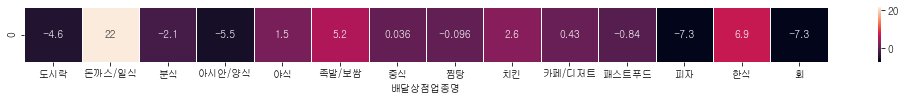

In [634]:
plt.figure(figsize=(18, 1))
sns.heatmap(dlvr_growth_mean.T, annot=True, linewidths=.5)
plt.show()

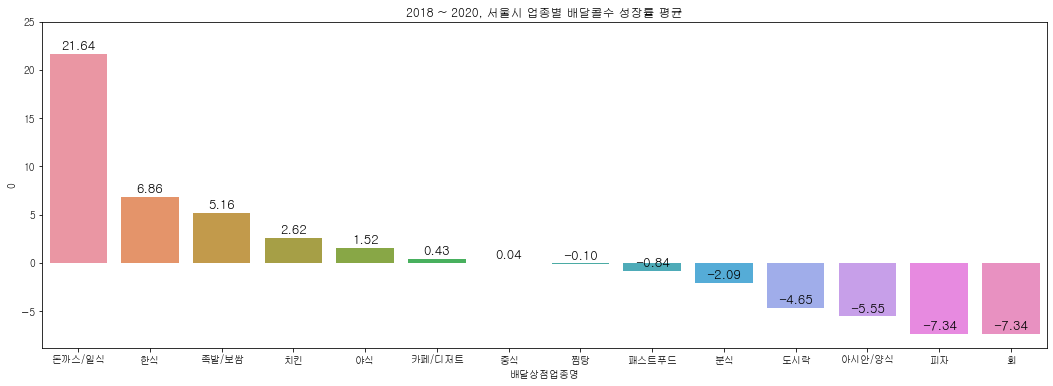

In [635]:
plt.figure(figsize=(18, 6))
plots = sns.barplot(data=dlvr_growth_mean, x=dlvr_growth_mean.index, y=0,
                   order=dlvr_growth_mean.sort_values(by=0, ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.ylim(top=25)
plt.title('2018 ~ 2020, 서울시 업종별 배달콜수 성장률 평균')
plt.show()

In [636]:
# 정규화를 진행합니다.
mean_ = dlvr_growth_mean.mean()[0]
std_ = dlvr_growth_mean.std()[0]
dlvr_growth_mean.loc[:, 'zscore'] = (dlvr_growth_mean.loc[:, 0] - mean_) / std_

In [637]:
# 구별로 같은 값을 복제해줍니다.
for col in goo:
    dlvr_growth_mean[col] = dlvr_growth_mean.zscore
dlvr_growth_zscore = dlvr_growth_mean.iloc[:, 2:]

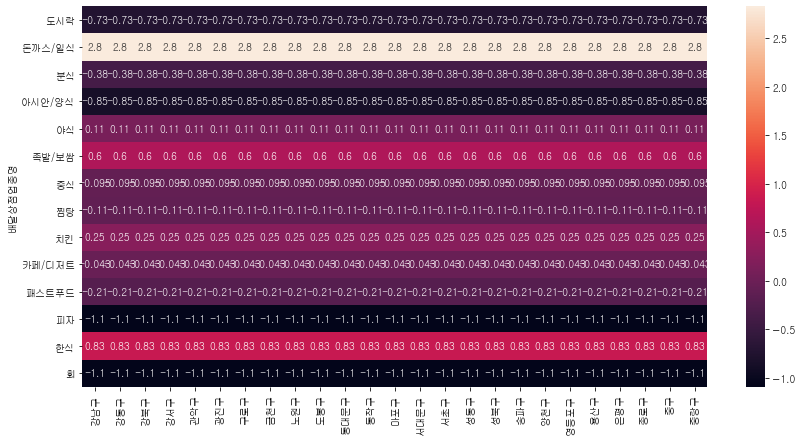

In [638]:
plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_growth_zscore, annot=True)
plt.show()

### MZ세대인구 비율

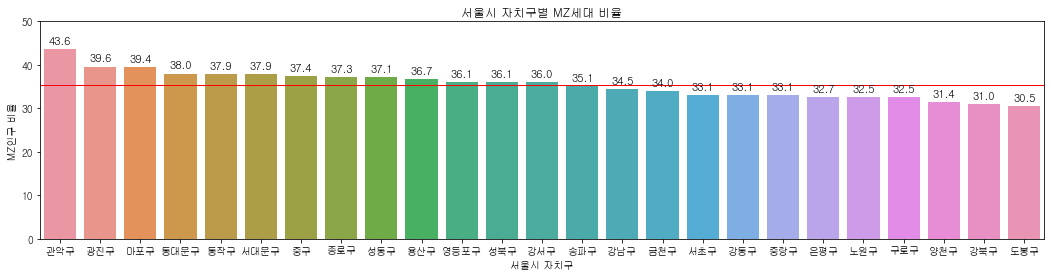

In [624]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_mz_rate, x = pop_mz_rate.index, y = 'S2_MZ비율', 
                    order = pop_mz_rate['S2_MZ비율'].sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=11, xytext=(0, 8), textcoords='offset points')

plt.axhline(y = pop_mz_rate['S2_MZ비율'].mean(), color = 'r', linewidth = 1)
plt.xlabel('서울시 자치구')
plt.ylabel('MZ인구 비율')
plt.title('서울시 자치구별 MZ세대 비율')
plt.ylim(top = 50)
plt.show()

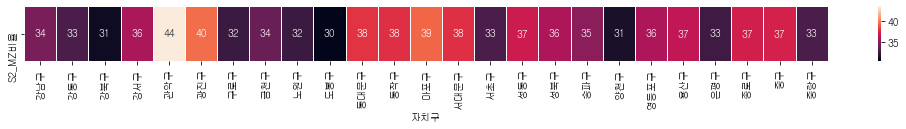

In [625]:
plt.figure(figsize=(18, 1))
sns.heatmap(pop_mz_rate.iloc[:, 0:1].T.round(2), annot = True, linewidth = .5)
plt.show()

In [749]:
## Z_score 정규화
mean_ = pop_mz_rate['S2_MZ비율'].mean()
std_ = pop_mz_rate['S2_MZ비율'].std()
pop_mz_rate['zscore'] = (pop_mz_rate['S2_MZ비율'] - mean_) / std_

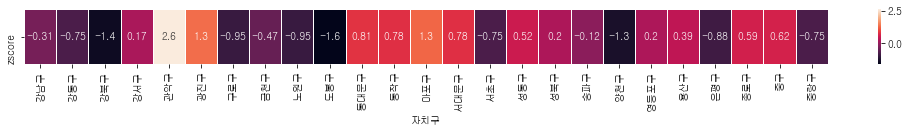

In [750]:
## 서울시 자치구별 MZ인구 비율
plt.figure(figsize=(18, 1))
sns.heatmap(pop_mz_rate.iloc[:, 1:].T.round(2), annot = True, linewidth = .5)
plt.show()

In [628]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_mz_rate[col] = pop_mz_rate.zscore
pop_mz_zscore = pop_mz_rate.iloc[:, 2:].T

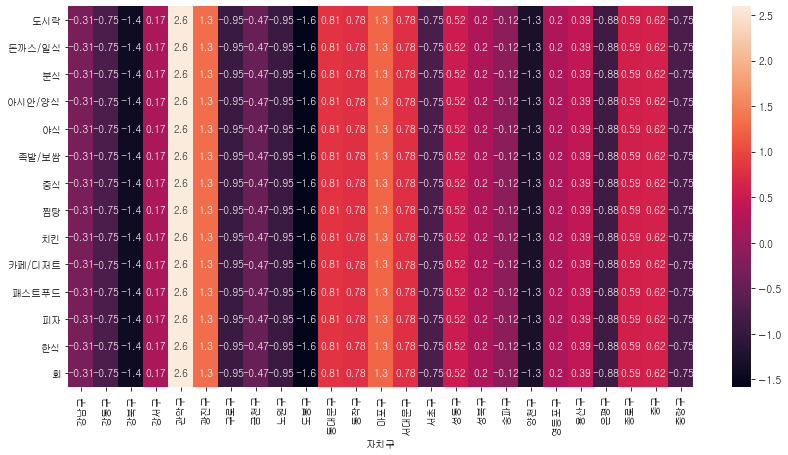

In [629]:
plt.figure(figsize=(14, 7))
sns.heatmap(pop_mz_zscore, annot=True)
plt.show()

# test

In [790]:
# 정규화를 진행합니다.
min_ = dlvr_lastmile.values.min()
max_ = dlvr_lastmile.values.max()
dlvr_lastmile_minmax = pd.DataFrame((dlvr_lastmile.values - min_) / (max_ - min_), columns = dlvr_lastmile.columns, index=dlvr_lastmile.index)

In [791]:
# 값이 작을수록 고득점이므로 1에서 빼줍니다.
dlvr_lastmile_minmax = 1 - dlvr_lastmile_minmax

In [792]:
# 정규화를 진행합니다.
min_ = dlvr_firstmile.values.min()
max_ = dlvr_firstmile.values.max()
dlvr_firstmile_minmax = pd.DataFrame((dlvr_firstmile.values - min_) / (max_ - min_), columns = dlvr_firstmile.columns, index=dlvr_firstmile.index)

In [793]:
# 값이 작을수록 고득점이므로 1에서 빼줍니다.
dlvr_firstmile_minmax = 1 - dlvr_firstmile_minmax

In [794]:
# 정규화를 진행합니다.
min_ = shop_close.values.min()
max_ = shop_close.values.max()
shop_close_minmax = pd.DataFrame((shop_close.values - min_) / (max_ - min_), columns = shop_close.columns, index=shop_close.index)

In [795]:
# 값이 작을수록 고득점이므로 1에서 빼줍니다.
shop_close_minmax = 1 - shop_close_minmax

In [796]:
# 인구대비업체수비율 정규화는 업종별로 다른 특성을 보이기 때문에 업종별로 따로 정규화를 실시합니다.
demo_shop_minmax = demo_shop_table.copy()
for col in list(demo_shop_table.columns):
    demo_shop_minmax[col] = (demo_shop_table[col] - demo_shop_table.min(axis=1)) / (demo_shop_table.max(axis=1) - demo_shop_table.min(axis=1))

In [797]:
# 값이 평균에서 멀어질수록 저득점, 평균과 가까울수록 고득점으로 치환합니다.
demo_shop_minmax = (-abs(demo_shop_minmax - 0.5) + 0.5)*2

In [798]:
# 정규화를 진행합니다.
min_ = pop_single_rate['S1_1인가구비율'].min()
max_ = pop_single_rate['S1_1인가구비율'].max()
pop_single_rate['minmax'] = (pop_single_rate['S1_1인가구비율'] - min_) / (max_ - min_)

In [799]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_single_rate[col] = pop_single_rate.minmax

In [800]:
pop_single_minmax = pop_single_rate.iloc[:, 2:-1].T

In [801]:
# 정규화를 진행합니다.
min_ = pop_mz_rate['S2_MZ비율'].min()
max_ = pop_mz_rate['S2_MZ비율'].max()
pop_mz_rate['minmax'] = (pop_mz_rate['S2_MZ비율'] - min_) / (max_ - min_)

In [802]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_mz_rate[col] = pop_mz_rate.minmax
pop_mz_minmax = pop_mz_rate.iloc[:, 2:-1].T

In [803]:
# 정규화를 진행합니다.
min_ = dlvr_growth_mean.min()[0]
max_ = dlvr_growth_mean.max()[0]
dlvr_growth_mean.loc[:, 'minmax'] = (dlvr_growth_mean.loc[:, 0] - min_) / (max_ - min_)

In [804]:
# 구별로 같은 값을 복제해줍니다.
for col in goo:
    dlvr_growth_mean[col] = dlvr_growth_mean.minmax
dlvr_growth_minmax = dlvr_growth_mean.iloc[:, 2:]

In [805]:
# 정규화를 진행합니다.
min_ = pop_mzgrowth_mean.min()[0]
max_ = pop_mzgrowth_mean.max()[0]
pop_mzgrowth_mean.loc[:, 'minmax'] = (pop_mzgrowth_mean.iloc[:, 0] - min_) / (max_ - min_)

In [806]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_mzgrowth_mean[col] = pop_mzgrowth_mean.minmax
pop_mzgrowth_minmax = pop_mzgrowth_mean.iloc[:, 2:].T

In [1026]:
tables = [dlvr_lastmile_minmax, dlvr_firstmile_minmax,
          shop_close_minmax, demo_shop_minmax,
          pop_single_minmax, pop_mzgrowth_minmax]

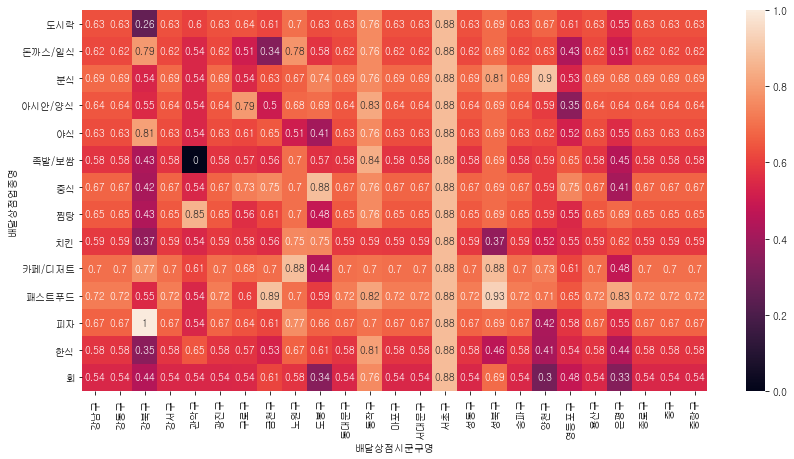

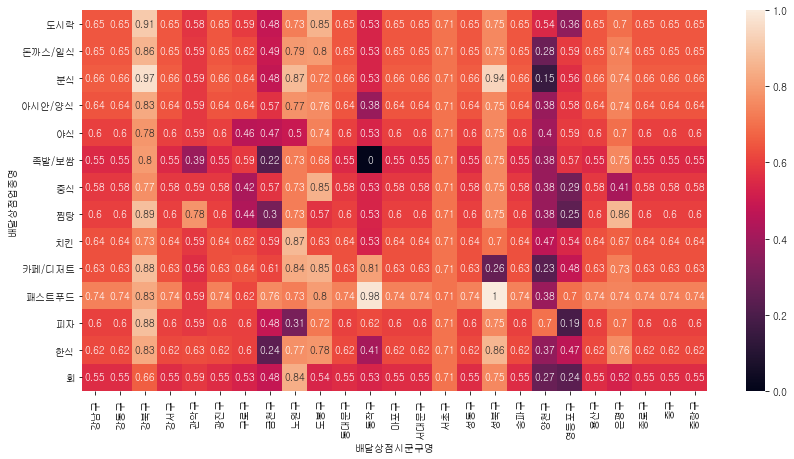

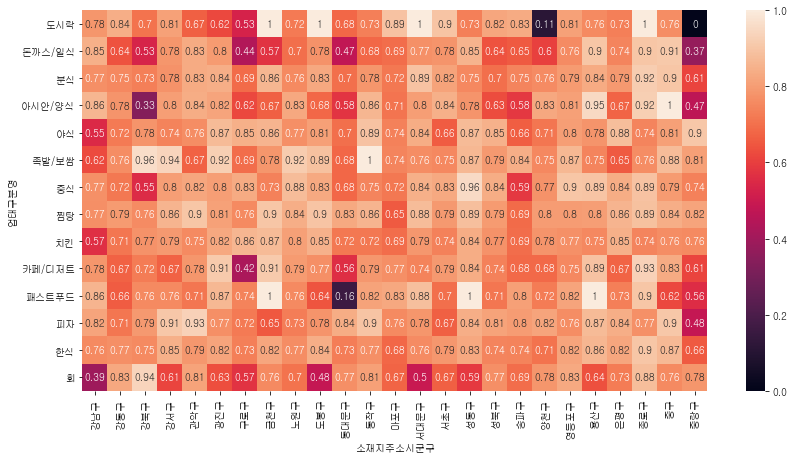

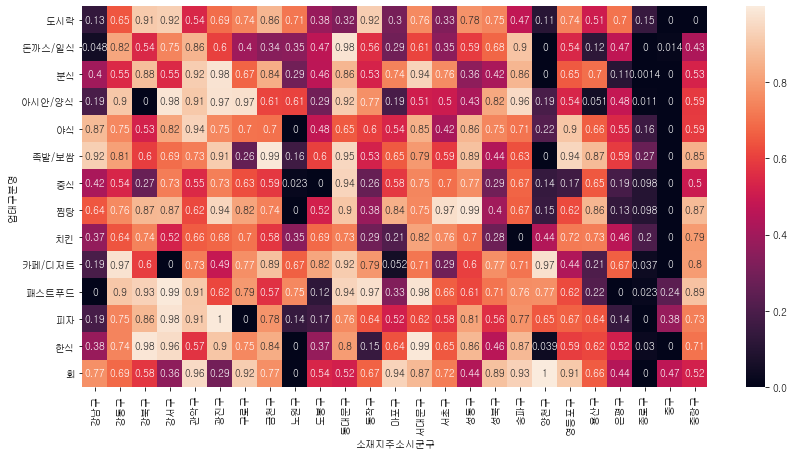

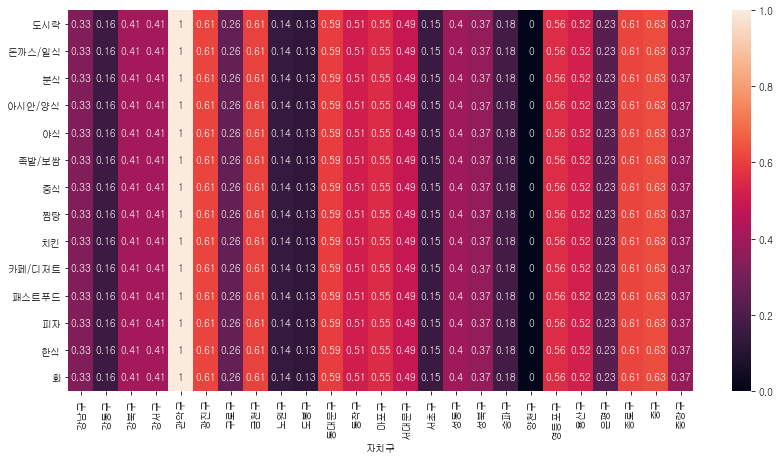

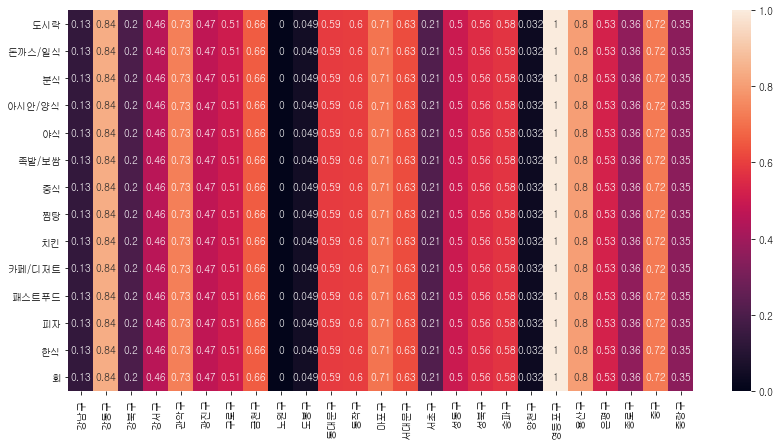

In [1033]:
for table in tables:
    plt.figure(figsize=(14, 7))
    sns.heatmap(table, annot=True)
    plt.show()

In [1028]:
temp = pd.DataFrame(dlvr_lastmile_minmax.values + 
                    dlvr_firstmile_minmax.values + 
                    shop_close_minmax.values + 
                    demo_shop_minmax.values + 
                    pop_single_minmax.values + 
                    pop_mzgrowth_minmax.values,
                    index=pop_mz_minmax.index, columns=pop_mz_minmax.columns)

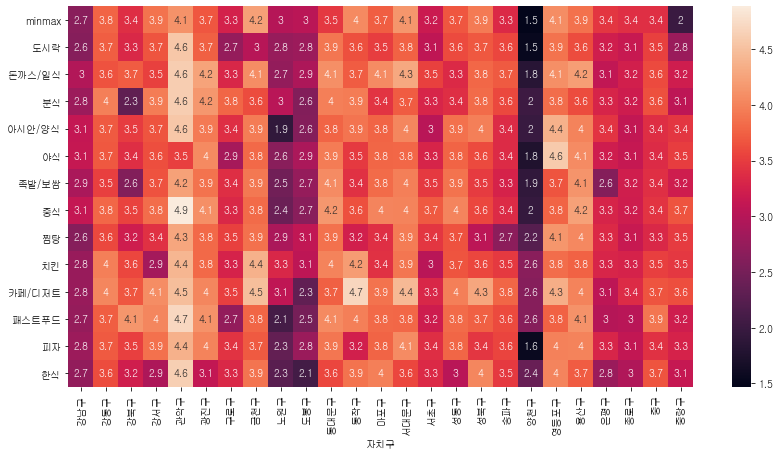

In [1029]:
plt.figure(figsize=(14, 7))
sns.heatmap(temp, annot=True)
plt.show()

In [1030]:
temp.stack().reset_index().sort_values(by=0, ascending=False).head(30)

level_0   자치구         0
179      중식   관악구  4.884967
279   패스트푸드   관악구  4.704557
261  카페/디저트   동작구  4.692506
329      한식   관악구  4.630085
54   돈까스/일식   관악구  4.611961
79       분식   관악구  4.605737
144      야식  영등포구  4.589664
104  아시안/양식   관악구  4.558363
29      도시락   관악구  4.551872
254  카페/디저트   관악구  4.482458
257  카페/디저트   금천구  4.478658
263  카페/디저트  서대문구  4.439350
229      치킨   관악구  4.417554
232      치킨   금천구  4.374517
119  아시안/양식  영등포구  4.373911
304      피자   관악구  4.364584
269  카페/디저트  영등포구  4.340960
63   돈까스/일식  서대문구  4.286692
266  카페/디저트   성북구  4.280864
204      찜탕   관악구  4.274984
55   돈까스/일식   광진구  4.247816
195      중식   용산구  4.239027
154   족발/보쌈   관악구  4.231193
7    minmax   금천구  4.221404
70   돈까스/일식   용산구  4.205650
236      치킨   동작구  4.192402
185      중식  동대문구  4.163170
80       분식   광진구  4.161639
13   minmax  서대문구  4.149309
277   패스트푸드   강북구  4.141385

# test2

In [436]:
np.quantile(dlvr_lastmile.values, 0)

6.25

In [815]:
# 정규화를 진행합니다.
onefour = np.quantile(dlvr_lastmile.values, 0.25)
thrfour = np.quantile(dlvr_lastmile.values, 0.75)
twofour = np.quantile(dlvr_lastmile.values, 0.50)
dlvr_lastmile_minmax = pd.DataFrame((dlvr_lastmile.values - twofour) / (thrfour - onefour),
                                    columns = dlvr_lastmile.columns, index=dlvr_lastmile.index)

In [816]:
dlvr_lastmile_minmax = 1 - dlvr_lastmile_minmax

In [817]:
# 정규화를 진행합니다.
onefour = np.quantile(dlvr_firstmile.values, 0.25)
thrfour = np.quantile(dlvr_firstmile.values, 0.75)
twofour = np.quantile(dlvr_firstmile.values, 0.50)
dlvr_firstmile_minmax = pd.DataFrame((dlvr_firstmile.values - twofour) / (thrfour - onefour), columns = dlvr_firstmile.columns, index=dlvr_firstmile.index)

In [818]:
dlvr_firstmile_minmax = 1 - dlvr_firstmile_minmax

In [819]:
# 정규화를 진행합니다.
onefour = np.quantile(shop_close.values, 0.25)
thrfour = np.quantile(shop_close.values, 0.75)
twofour = np.quantile(shop_close.values, 0.50)
shop_close_minmax = pd.DataFrame((shop_close.values - twofour) / (thrfour - onefour),
                                 columns = shop_close.columns, index=shop_close.index)

In [820]:
shop_close_minmax = 1 - shop_close_minmax

In [821]:
# 인구대비업체수비율 정규화는 업종별로 다른 특성을 보이기 때문에 업종별로 따로 정규화를 실시합니다.
onefour = np.quantile(demo_shop_table.values, 0.25)
thrfour = np.quantile(demo_shop_table.values, 0.75)
twofour = np.quantile(demo_shop_table.values, 0.50)
demo_shop_minmax = demo_shop_table.copy()
for col in list(demo_shop_table.columns):
    demo_shop_minmax[col] = (demo_shop_table[col] - twofour) / (thrfour - onefour)

In [822]:
demo_shop_minmax = (-abs(demo_shop_minmax - 0.5) + 0.5)*2

In [823]:
## Z_score 정규화
onefour = np.quantile(pop_single_rate['S1_1인가구비율'], 0.25)
thrfour = np.quantile(pop_single_rate['S1_1인가구비율'], 0.75)
twofour = np.quantile(pop_single_rate['S1_1인가구비율'], 0.50)
pop_single_rate['minmax'] = (pop_single_rate['S1_1인가구비율'] - twofour) / (thrfour - onefour)

In [824]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_single_rate[col] = pop_single_rate.minmax

In [825]:
pop_single_minmax = pop_single_rate.iloc[:, 2:-1].T

In [826]:
## Z_score 정규화
onefour = np.quantile(pop_mz_rate['S2_MZ비율'], 0.25)
thrfour = np.quantile(pop_mz_rate['S2_MZ비율'], 0.75)
twofour = np.quantile(pop_mz_rate['S2_MZ비율'], 0.50)
pop_mz_rate['minmax'] = (pop_mz_rate['S2_MZ비율'] - twofour) / (thrfour - onefour)

In [827]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_mz_rate[col] = pop_mz_rate.minmax
pop_mz_minmax = pop_mz_rate.iloc[:, 2:-1].T

In [842]:
# 정규화를 진행합니다.
onefour = np.quantile(dlvr_growth_mean.iloc[:, 2: -1], 0.25)
thrfour = np.quantile(dlvr_growth_mean.iloc[:, 2: -1], 0.75)
twofour = np.quantile(dlvr_growth_mean.iloc[:, 2: -1], 0.50)
dlvr_growth_mean.loc[:, 'minmax'] = (dlvr_growth_mean.iloc[:, 2: -1] - twofour) / (thrfour - onefour)

In [843]:
# 구별로 같은 값을 복제해줍니다.
for col in goo:
    dlvr_growth_mean[col] = dlvr_growth_mean.minmax
dlvr_growth_minmax = dlvr_growth_mean.iloc[:, 2:-1]

In [830]:
# 정규화를 진행합니다.
onefour = np.quantile(pop_mzgrowth_mean, 0.25)
thrfour = np.quantile(pop_mzgrowth_mean, 0.75)
twofour = np.quantile(pop_mzgrowth_mean, 0.50)
pop_mzgrowth_mean.loc[:, 'minmax'] = (pop_mzgrowth_mean.iloc[:, 0] - twofour) / (thrfour - onefour)

In [831]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_mzgrowth_mean[col] = pop_mzgrowth_mean.minmax
pop_mzgrowth_minmax = pop_mzgrowth_mean.iloc[:, 2:-1].T

In [849]:
temp = pd.DataFrame(dlvr_lastmile_minmax.values + 
                    dlvr_firstmile_minmax.values + 
                    shop_close_minmax.values + 
                    demo_shop_minmax.values + 
                    pop_single_minmax.values + 
                    pop_mz_minmax.values + 
                    dlvr_growth_minmax.values + 
                    pop_mzgrowth_minmax.values,
                    index=pop_mz_minmax.index, columns=pop_mz_minmax.columns)

In [845]:
tables = [dlvr_lastmile_minmax, dlvr_firstmile_minmax, shop_close_minmax, demo_shop_minmax, pop_single_minmax,
          pop_mz_minmax, dlvr_growth_minmax, pop_mzgrowth_minmax]

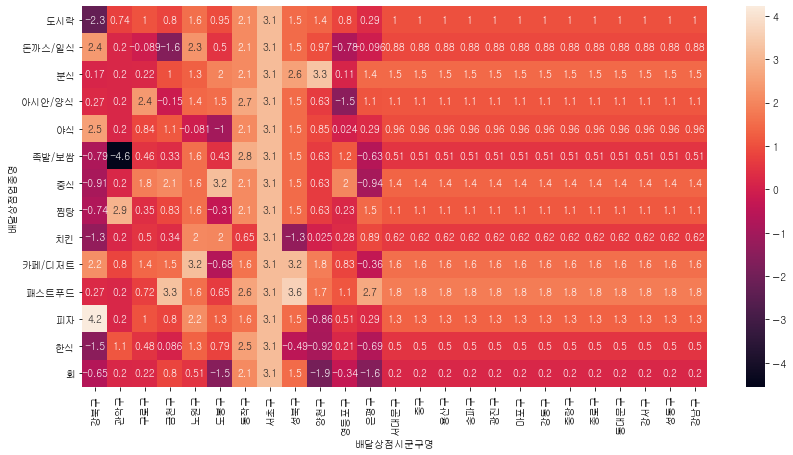

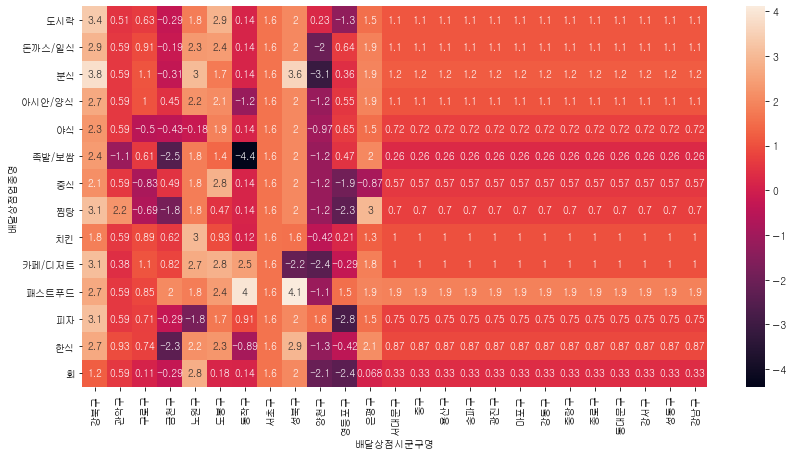

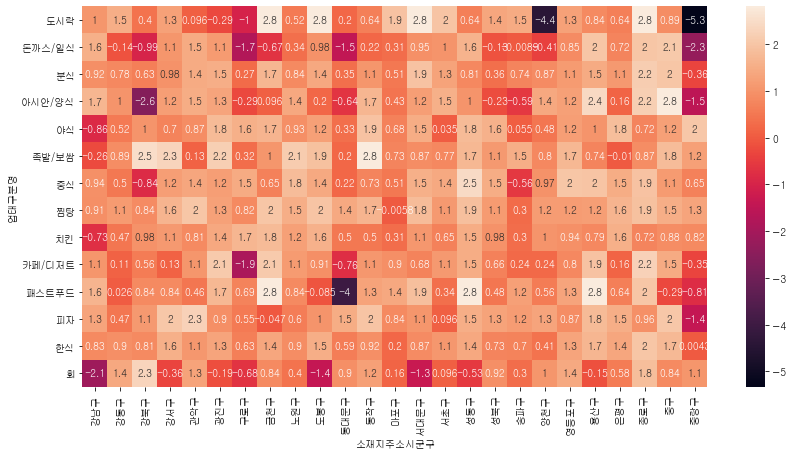

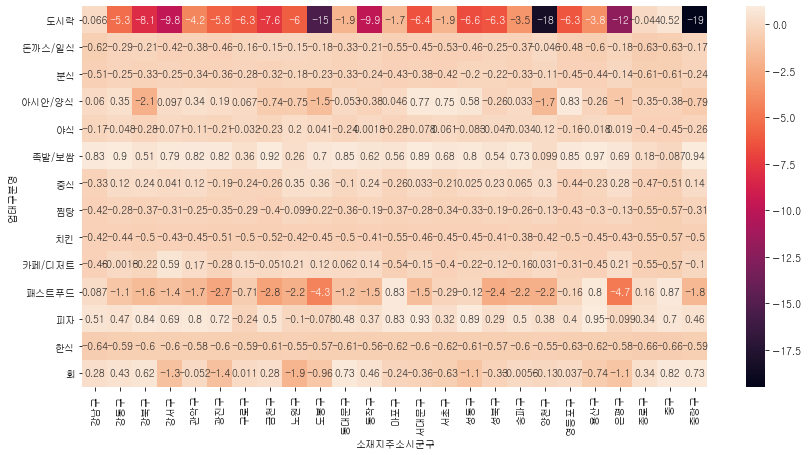

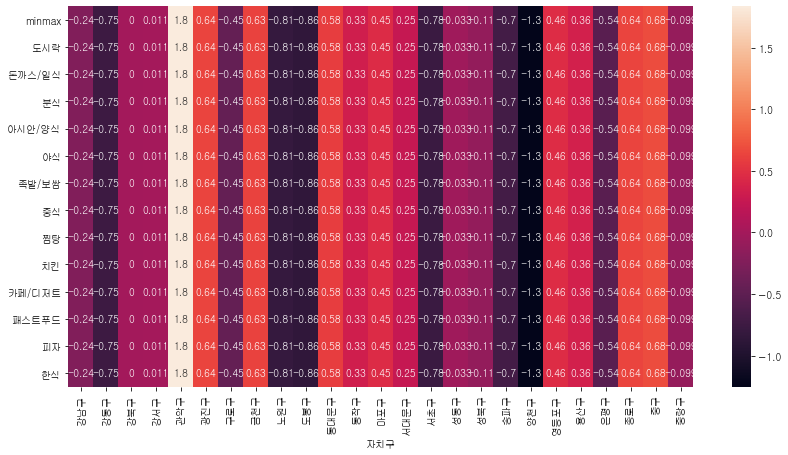

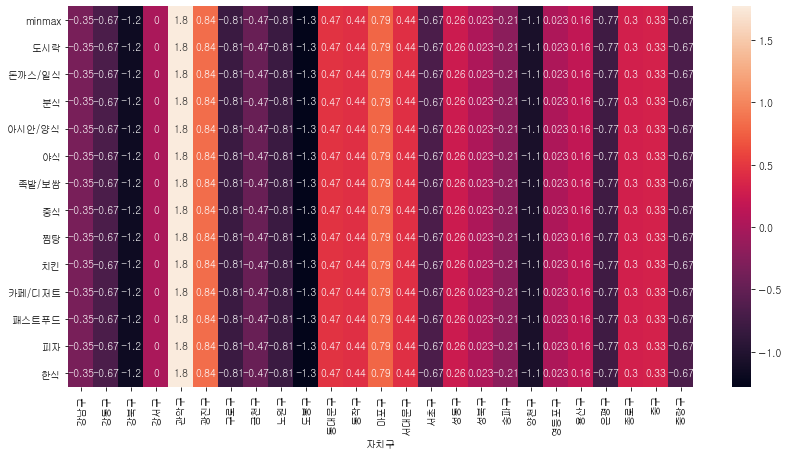

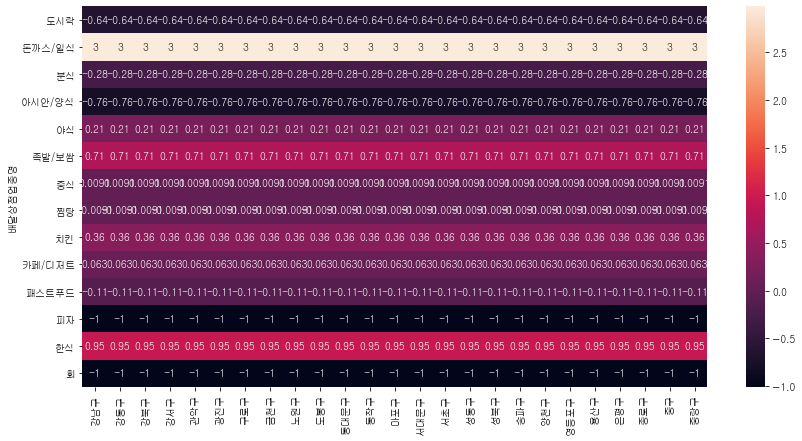

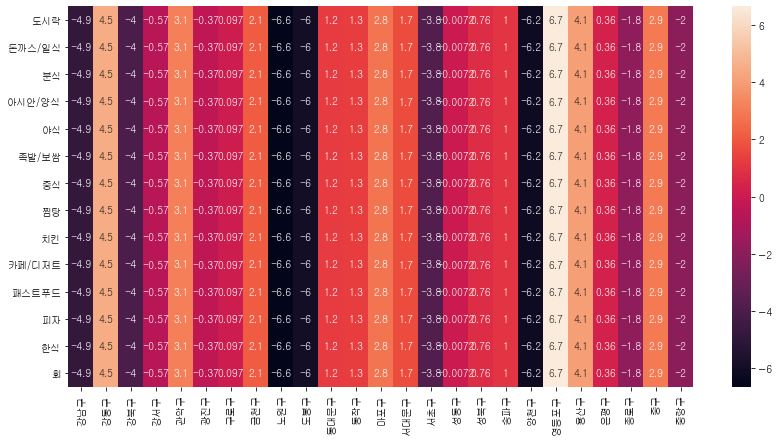

In [847]:
for table in tables:
    plt.figure(figsize=(14, 7))
    sns.heatmap(table, annot=True)
    plt.show()

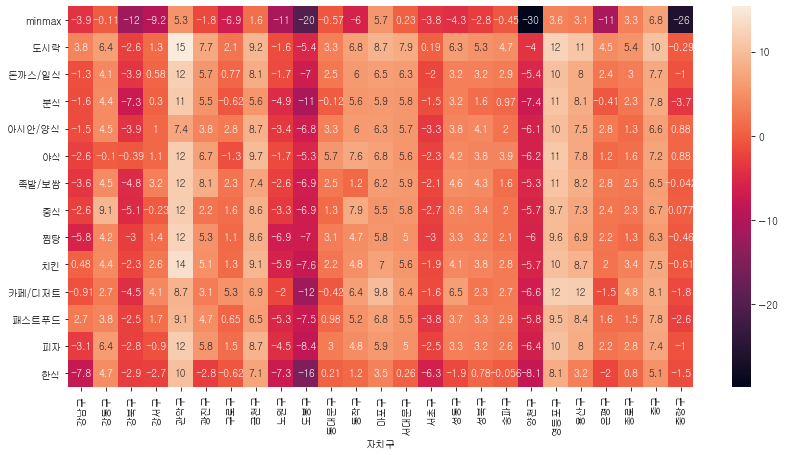

In [850]:
plt.figure(figsize=(14, 7))
sns.heatmap(temp, annot=True)
plt.show()

In [851]:
temp.stack().reset_index().sort_values(by=0, ascending=False).head(30)

level_0   자치구          0
29      도시락   관악구  15.385951
229      치킨   관악구  13.876309
204      찜탕   관악구  12.484621
44      도시락  영등포구  12.476994
54   돈까스/일식   관악구  11.875514
269  카페/디저트  영등포구  11.866395
179      중식   관악구  11.830898
129      야식   관악구  11.745770
270  카페/디저트   용산구  11.744396
304      피자   관악구  11.651395
154   족발/보쌈   관악구  11.573397
79       분식   관악구  11.389396
144      야식  영등포구  11.200863
45      도시락   용산구  10.934431
169   족발/보쌈  영등포구  10.650090
94       분식  영등포구  10.616113
48      도시락    중구  10.350952
244      치킨  영등포구  10.240880
329      한식   관악구  10.210327
69   돈까스/일식  영등포구  10.209499
319      피자  영등포구  10.185703
119  아시안/양식  영등포구  10.081607
262  카페/디저트   마포구   9.792093
194      중식  영등포구   9.719622
132      야식   금천구   9.693891
219      찜탕  영등포구   9.578718
294   패스트푸드  영등포구   9.476102
32      도시락   금천구   9.185805
279   패스트푸드   관악구   9.133477
232      치킨   금천구   9.114468

# test3

In [783]:
a = np.log(dlvr_lastmile_minmax.values + 5)
b = np.log(dlvr_firstmile_minmax.values + 5)
c = np.log(shop_close_minmax.values + 5)
d = np.log(demo_shop_minmax.values + 5)
e = np.log(pop_single_minmax.values + 5)
f = np.log(pop_mz_minmax.values + 5)
g = np.log(dlvr_growth_minmax.values + 5)
h = np.log(pop_mzgrowth_minmax.values + 5)

In [763]:
a = np.log(dlvr_lastmile_zscore.values + 10)
b = np.log(dlvr_firstmile_zscore.values + 10)
c = np.log(shop_close_zscore.values + 10)
d = np.log(demo_shop_zscore.values + 10)
e = np.log(pop_single_zscore.values + 10)
f = np.log(pop_mz_zscore.values + 10)
g = np.log(dlvr_growth_zscore.values + 10)
h = np.log(pop_mzgrowth_zscore.values + 10)

In [787]:
temp = pd.DataFrame((a + b) + (c + d) + (e ) + (h),
                    index=pop_mz_minmax.index, columns=pop_mz_minmax.columns)

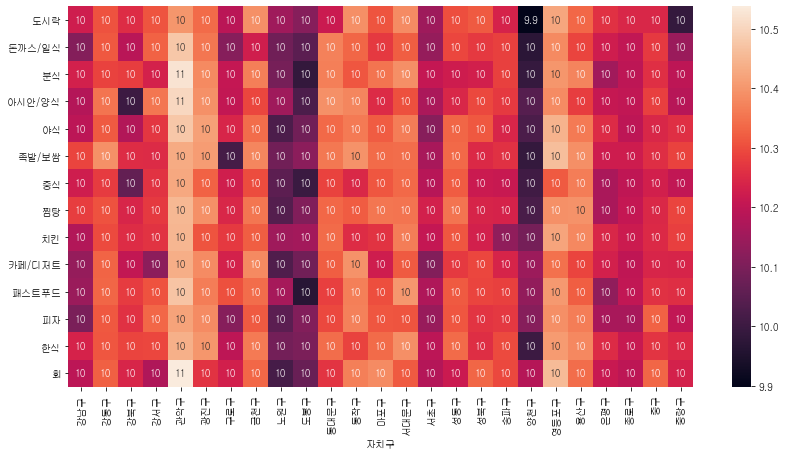

In [788]:
plt.figure(figsize=(14, 7))
sns.heatmap(temp, annot=True)
plt.show()

In [789]:
temp.stack().reset_index().sort_values(by=0, ascending=False).head(30)

level_0   자치구          0
329       회   관악구  10.537951
54       분식   관악구  10.523805
79   아시안/양식   관악구  10.503375
29   돈까스/일식   관악구  10.477643
104      야식   관악구  10.477110
254   패스트푸드   관악구  10.470701
144   족발/보쌈  영등포구  10.462185
344       회  영등포구  10.457272
179      찜탕   관악구  10.452573
204      치킨   관악구  10.448967
119      야식  영등포구  10.444076
304      한식   관악구  10.438492
229  카페/디저트   관악구  10.435895
129   족발/보쌈   관악구  10.432181
154      중식   관악구  10.426691
19      도시락  영등포구  10.424008
219      치킨  영등포구  10.420830
279      피자   관악구  10.419602
105      야식   광진구  10.413209
130   족발/보쌈   광진구  10.410382
319      한식  영등포구  10.406550
269   패스트푸드  영등포구  10.404365
263   패스트푸드  서대문구  10.400833
305      한식   광진구  10.400228
69       분식  영등포구  10.398901
4       도시락   관악구  10.398601
236  카페/디저트   동작구  10.395100
136   족발/보쌈   동작구  10.394432
195      찜탕   용산구  10.394011
7       도시락   금천구  10.392737

# test4

In [669]:
# 총 6개 등급, 총점 10점의 학점 제도

# A:  2 ~    : 1.25
# B:  1 ~  2 : 1.10
# C:  0 ~  1 : 0.95
# D: -1 ~  0 : 0.80
# E: -2 ~ -1 : 0.65
# F:    ~ -2 : 0.50

In [674]:
def grade_score(score_table):
    a = np.where(score_table > -2,
             np.where(score_table > -1,
                      np.where(score_table > 0,
                               np.where(score_table > 1,
                                        np.where(score_table > 2,
                                                 1.25,
                                                 1.10),
                                        0.95),
                               0.80),
                      0.65),
             0.50)
    return a

In [675]:
a = grade_score(dlvr_lastmile_zscore.values)
b = grade_score(dlvr_firstmile_zscore.values)
c = grade_score(shop_close_zscore.values)
d = grade_score(demo_shop_zscore.values)
e = grade_score(pop_single_zscore.values) 
f = grade_score(pop_mz_zscore.values)
g = grade_score(dlvr_growth_zscore.values)
h = grade_score(pop_mzgrowth_zscore.values)

In [676]:
temp = pd.DataFrame((a + b) + (c + d) + (e + f) + (g + h),
                    index=pop_mz_minmax.index, columns=pop_mz_minmax.columns)

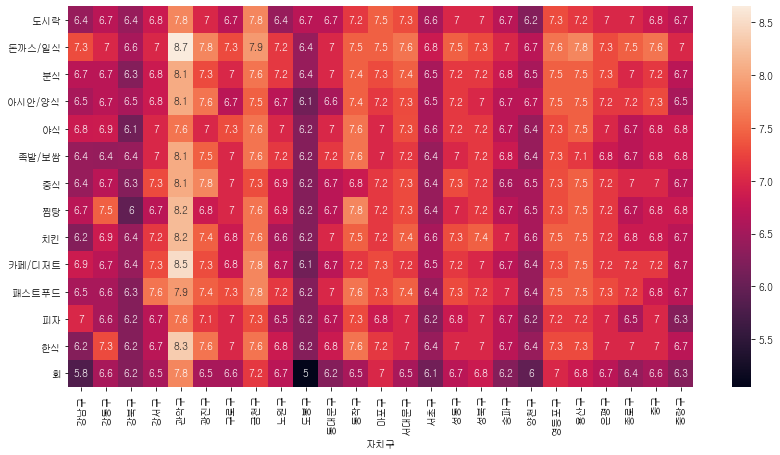

In [677]:
plt.figure(figsize=(14, 7))
sns.heatmap(temp, annot=True)
plt.show()

In [678]:
temp.stack().reset_index().sort_values(by=0, ascending=False).head(30)

level_0   자치구     0
29   돈까스/일식   관악구  8.65
229  카페/디저트   관악구  8.50
304      한식   관악구  8.35
204      치킨   관악구  8.20
179      찜탕   관악구  8.20
154      중식   관악구  8.05
79   아시안/양식   관악구  8.05
54       분식   관악구  8.05
129   족발/보쌈   관악구  8.05
254   패스트푸드   관악구  7.90
32   돈까스/일식   금천구  7.90
155      중식   광진구  7.75
257   패스트푸드   금천구  7.75
186      찜탕   동작구  7.75
30   돈까스/일식   광진구  7.75
45   돈까스/일식   용산구  7.75
4       도시락   관악구  7.75
232  카페/디저트   금천구  7.75
7       도시락   금천구  7.75
329       회   관악구  7.75
48   돈까스/일식    중구  7.60
38   돈까스/일식  서대문구  7.60
182      찜탕   금천구  7.60
132   족발/보쌈   금천구  7.60
57       분식   금천구  7.60
44   돈까스/일식  영등포구  7.60
279      피자   관악구  7.60
80   아시안/양식   광진구  7.60
136   족발/보쌈   동작구  7.60
305      한식   광진구  7.60

In [654]:
dlvr_lastmile_zscore.values.max(), dlvr_lastmile_zscore.values.min()

(3.1494296803262416, -5.512070224141326)

In [655]:
dlvr_firstmile_zscore.values.max(), dlvr_firstmile_zscore.values.min()

(2.8841911211696187, -4.7407678584119575)

In [656]:
shop_close_zscore.values.max(), shop_close_zscore.values.min()

(1.8683858047862314, -6.092199493394087)

In [657]:
demo_shop_zscore.values.max(), demo_shop_zscore.values.min()

(2.448115297919259, -2.4974221805911356)

In [658]:
pop_single_zscore.values.max(), pop_single_zscore.values.min()

(2.6609496725958315, -1.8401751648676177)

In [659]:
pop_mz_zscore.values.max(), pop_mz_zscore.values.min()

(2.595764504579956, -1.583748156432509)

In [660]:
dlvr_growth_zscore.values.max(), dlvr_growth_zscore.values.min()

(2.8301642573135664, -1.0948035390324111)

In [661]:
pop_mzgrowth_zscore.values.max(), pop_mzgrowth_zscore.values.min()

(1.9258524209672547, -1.8383009580761545)